### Lab 3. Gradient descent methods


1. Implement:

   (a) Momentum method;

   (b) Nesterov method

   (c) AdaGrad method 

   (d) AdaDelta method

   (e) RMSProp method

   (f) Adam method

2. For the study, consider:

   (a) Well-conditioned (μ ≃1) two-dimensional quadratic function;

   (b) Ill-conditioned (μ > 10) two-dimensional quadratic function;

   (c) Rosenbrock function.

3. For each function:

   (a) Build a table that reflects the dependence of the number of iterations of the gradient method, the number of function calculations(if any), and the number of function gradient calculations (if any) for each of the methods on the chosen accuracy;

   (b) plot the data from the table (abscissa axis – accuracy, ordinate axis – number of iterations/function/gradient calculations);

4. For the Rosenbrock function, plot and compare the trajectories of each method on the level line plot.

5. Implement a generator of quadratic functions of a given dimension and condition number. Investigate the dependence of the number of iterations that must be performed to achieve the selected accuracy, depending on these parameters. Consider this dependence for two gradient methods, one of which is (necessarily) the conjugate gradient method.


#### 1

Implement:

(a) Constant-step gradient descent;

(b) Gradient descent with fractional steps (Armijo condition);

(c) Steepest descent (using any two one-dimensional search methods);

(d) Conjugate gradient method (with restart).


In [18]:
import numpy as np
import pandas as pd
import numba as nb
import matplotlib.pyplot as plt
import warnings
from IPython.display import Markdown
from typing import Callable


In [19]:
def grad(
    f: Callable[[np.ndarray], float],
    x: np.ndarray,
):
    Delta_f = np.zeros_like(x, dtype=float)
    for k in range(len(x)):
        dx = np.zeros_like(x, dtype=float)
        dx[k] = np.finfo(float).eps * 10
        # print(f(x + dx))
        Delta_f[k] = (f(x + dx) - f(x - dx)) / (2 * np.linalg.norm(dx))
    return Delta_f


In [20]:
# a
def momentum_method(
    f: Callable[[np.ndarray], np.ndarray],
    x0: np.ndarray,
    lr: float = 0.01,
    momentum=0.9,
    maxit: int = 1000,
    eps: float = 1e-9,
    info=False,
) -> np.ndarray:
    iters = 0
    calls = 0
    grad_calls = 0
    trajectory = []

    x = x0
    v = 0.0
    for _ in range(maxit):
        if np.linalg.norm(x) < eps:
            break

        trajectory.append(x.copy())
        iters += 1
        grad_calls += 1

        v = lr * (1 - momentum) * grad(f, x) + momentum * v
        x -= v

    trajectory.append(x.copy())
    if info:
        return x, iters, calls, grad_calls, trajectory
    else:
        return x

In [21]:
# b
def nesterov_method(
    f: Callable[[np.ndarray], np.ndarray],
    x0: np.ndarray,
    lr: float = 0.01,
    momentum=0.9,
    maxit: int = 1000,
    eps: float = 1e-9,
    info=False,
) -> np.ndarray:
    iters = 0
    calls = 0
    grad_calls = 1
    trajectory = []

    x = x0
    v = 0.0
    g = grad(f,x)
    for _ in range(maxit):
        if np.linalg.norm(x) < eps:
            break

        trajectory.append(x.copy())
        iters += 1
        grad_calls += 1

        new_g = grad(f, x - lr * g)
        v = lr * (1 - momentum) * new_g  + momentum * v
        x -= v
        g = new_g

    trajectory.append(x.copy())
    if info:
        return x, iters, calls, grad_calls, trajectory
    else:
        return x

In [22]:
# c
def adagrad_method(
    f: Callable[[np.ndarray], np.ndarray],
    x0: np.ndarray,
    lr: float = 0.1,
    maxit: int = 1000,
    eps: float = 1e-9,
    gamma: float = 1e-6,
    info=False,
) -> np.ndarray:
    iters = 0
    calls = 0
    grad_calls = 0
    trajectory = []

    x = x0
    G = 0.0
    for _ in range(maxit):
        if np.linalg.norm(x) < eps:
            break

        trajectory.append(x.copy())
        iters += 1
        grad_calls += 1
        g = grad(f,x)
        G = G + g.T @ g
        x -= lr / (G + gamma) ** 0.5 * g

    trajectory.append(x.copy())
    if info:
        return x, iters, calls, grad_calls, trajectory
    else:
        return x

In [23]:
# d
def adadelta_method(
    f: Callable[[np.ndarray], np.ndarray],
    x0: np.ndarray,
    lr: float = 0.1,
    maxit: int = 1000,
    eps: float = 1e-9,
    gamma: float = 1e-6,
    info=False,
) -> np.ndarray:
    iters = 0
    calls = 0
    grad_calls = 0
    trajectory = []

    x = x0
    G = 0.0
    dx = np.zeros_like(x)
    xi = lr
    for _ in range(maxit):
        if np.linalg.norm(x) < eps:
            break

        trajectory.append(x.copy())
        iters += 1
        grad_calls += 1
        g = grad(f, x)
        G = lr * G + (1 - lr) * g.T @ g
        xi = lr * xi + (1 - lr) * (dx.T @ dx)
        x -= (xi + gamma) ** 0.5 / (G + gamma) ** 0.5 * g

    trajectory.append(x.copy())
    if info:
        return x, iters, calls, grad_calls, trajectory
    else:
        return x

In [24]:
# e
def rmsprop_method(
    f: Callable[[np.ndarray], np.ndarray],
    x0: np.ndarray,
    lr: float = 0.01,
    maxit: int = 1000,
    eps: float = 1e-9,
    gamma: float = 1e-6,
    beta: float = 0.01,
    info=False,
) -> np.ndarray:
    iters = 0
    calls = 0
    grad_calls = 0
    trajectory = []

    x = x0
    G = 0.0
    for _ in range(maxit):
        if np.linalg.norm(x) < eps:
            break

        trajectory.append(x.copy())
        iters += 1
        grad_calls += 1
        g = grad(f, x)
        G = beta * G + (1 - beta) * g.T @ g
        x -= lr / (G + gamma) ** 0.5 * g

    trajectory.append(x.copy())
    if info:
        return x, iters, calls, grad_calls, trajectory
    else:
        return x

In [25]:
# e
def adam_method(
    f: Callable[[np.ndarray], np.ndarray],
    x0: np.ndarray,
    lr: float = 1,
    maxit: int = 1000,
    eps: float = 1e-9,
    gamma: float = 1e-6,
    beta1: float = 0.9,
    beta2: float = 0.999,
    info=False,
) -> np.ndarray:
    iters = 0
    calls = 0
    grad_calls = 0
    trajectory = []

    x = x0
    m = 0
    v = 0
    for _ in range(maxit):
        if np.linalg.norm(x) < eps:
            break

        trajectory.append(x.copy())
        iters += 1
        grad_calls += 1
        g = grad(f, x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g.T @ g)
        x -= lr / (v + gamma) ** 0.5 * m

    trajectory.append(x.copy())
    if info:
        return x, iters, calls, grad_calls, trajectory
    else:
        return x

In [26]:
def test_gd_simple():
    def f1(x):
        return np.linalg.norm(x) ** 2

    print(momentum_method(f1, np.random.random(1), 0.1))
    assert np.isclose(momentum_method(f1, np.random.random(1), 0.1), 0)
    print(nesterov_method(f1, np.random.random(1), 0.1))
    assert np.isclose(nesterov_method(f1, np.random.random(1), 0.1), 0)
    print(adagrad_method(f1, np.random.random(1), 0.1))
    assert np.isclose(adagrad_method(f1, np.random.random(1), 0.1), 0)
    print(rmsprop_method(f1, np.random.random(1), 0.1))
    # assert np.isclose(rmsprop_method(f1, np.random.random(1), 0.1), 0)
    print(adadelta_method(f1, np.random.random(1), 0.1))
    # assert np.isclose(adadelta_method(f1, np.random.random(1), 0.1), 0)
    print(adam_method(f1, np.random.random(1), 0.1))
    assert np.isclose(adam_method(f1, np.random.random(1), 0.1), 0)

test_gd_simple()


[-4.8125388e-10]
[2.98785683e-10]
[9.81625295e-10]
[0.05001182]
[-1.66203979e-05]
[3.66404922e-10]


#### 2

For the study, consider:

(a) Well-conditioned (μ ≃1) two-dimensional quadratic function;

(b) Ill-conditioned (μ > 10) two-dimensional quadratic function;

(c) Rosenbrock function.


/tmp/ipykernel_50911/2188835328.py:11: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  G = Q.T @ D @ Q
/tmp/ipykernel_50911/2188835328.py:11: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  G = Q.T @ D @ Q


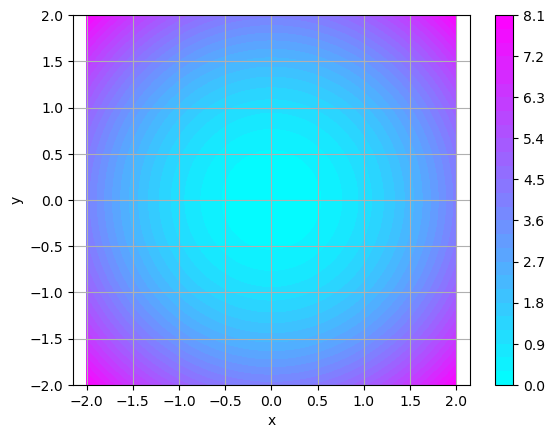

In [27]:
# a
@nb.njit
def f_a(x: np.ndarray) -> np.ndarray:
    assert len(x.shape) == 1
    assert x.shape[0] == 2
    mu = 1
    w = np.sqrt(mu)
    D = np.diag(np.array([1.0, 1.0]))
    C = np.array([[5.0, 3.0], [4.0, 2.0]])
    Q, R = np.linalg.qr(C)
    G = Q.T @ D @ Q
    B = G.T @ G
    A = (B.T + B) / 2
    # print(np.linalg.cond(A), mu, w)
    # print(A, D)
    assert np.isclose(np.linalg.cond(A), mu)
    return x.T @ A @ x


def test_f_a():
    x = np.linspace(-2, 2, 50)
    y = np.linspace(-2, 2, 50)
    xr, yr = np.meshgrid(x, y)
    z = 0 * xr * yr
    # cond_num = z.copy()
    # grad_norm = z.copy()
    for qx, xp in enumerate(x):
        for qy, yp in enumerate(y):
            p = np.array([xp, yp])
            z[qy, qx] = f_a(p)
            # cond_num[qy, qx] = np.linalg.norm(p)/np.linalg.norm(f_a(p))*np.linalg.norm(grad(f_a, p))
            # grad_norm[qy, qx] = np.linalg.norm(grad(f_a, p))

    plt.contourf(x, y, z, levels=30, cmap="cool")
    plt.grid()
    plt.axis("equal")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    plt.show()
    # plt.contourf(x, y, cond_num, levels=30)
    # plt.grid()
    # plt.axis("equal")
    # plt.xlabel("x")
    # plt.ylabel("y")
    # plt.colorbar()
    # plt.show()

    # plt.contourf(x, y, grad_norm, levels=30)
    # plt.grid()
    # plt.axis("equal")
    # plt.xlabel("x")
    # plt.ylabel("y")
    # plt.colorbar()
    # plt.show()


test_f_a()


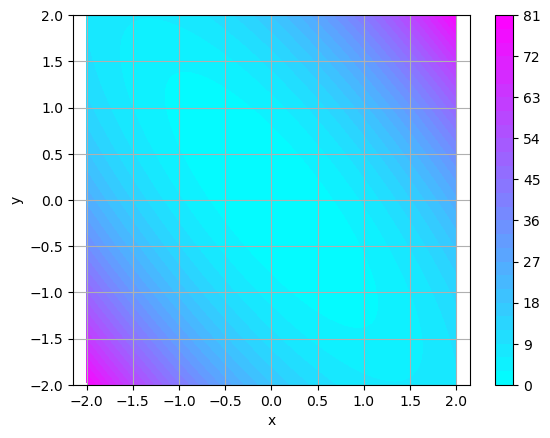

In [28]:
# b
@nb.njit
def f_b(x: np.ndarray) -> np.ndarray:
    assert len(x.shape) == 1
    assert x.shape[0] == 2

    mu = 10.0
    w = np.sqrt(mu)
    D = np.diag(np.array([w, 1.0]))
    C = np.array([[5.0, 3.0], [4.0, 2.0]])
    Q, R = np.linalg.qr(C)
    G = Q.T @ D @ Q
    B = G.T @ G
    A = (B.T + B) / 2
    # print(np.linalg.cond(A), mu, w)
    # print(A, D)
    assert np.isclose(np.linalg.cond(A), mu)
    return x.T @ A @ x


def test_f_b():
    x = np.linspace(-2, 2, 50)
    y = np.linspace(-2, 2, 50)
    xr, yr = np.meshgrid(x, y)
    z = 0 * xr * yr
    for qx, xp in enumerate(x):
        for qy, yp in enumerate(y):
            p = np.array([xp, yp])
            z[qy, qx] = f_b(p)

    plt.contourf(x, y, z, levels=30, cmap="cool")
    plt.grid()
    plt.axis("equal")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    plt.show()


test_f_b()


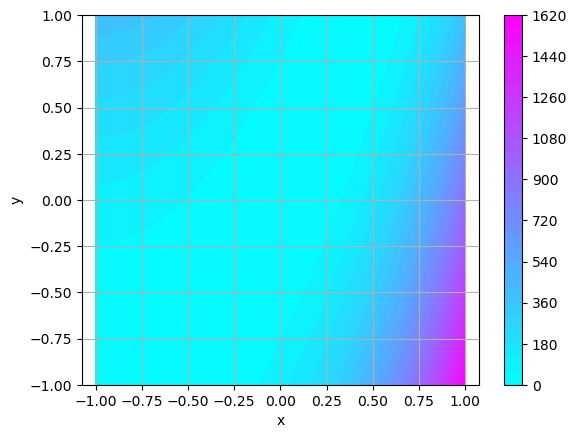

In [29]:
# c
@nb.njit
def f_c(x: np.ndarray) -> np.ndarray:
    # rosenbrock - shifted so that minimum at (0,0)
    # a:float=1.
    # b:float=100.
    # assert len(x.shape) == 1
    # assert x.shape[0] == 2
    # yp = x[1]+a**2
    # xp = x[0]+a
    # return (a - xp) ** 2 + b * (yp - xp ** 2) ** 2
    return (x[0]) ** 2 + 100.0 * ((x[1] + 1.0) - (x[0] + 1.0) ** 2) ** 2


def test_f_c():
    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    xr, yr = np.meshgrid(x, y)
    z = 0 * xr * yr
    for qx, xp in enumerate(x):
        for qy, yp in enumerate(y):
            p = np.array([xp, yp])
            z[qy, qx] = f_c(p)

    plt.contourf(x, y, z, levels=30, cmap="cool")
    plt.grid()
    plt.axis("equal")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    plt.show()


test_f_c()


#### 3

For each function:

(a) Build a table that reflects the dependence of the number of iterations of the gradient method, the number of function calculations(if any), and the number of function gradient calculations (if any) for each of the methods on the chosen accuracy;

(b) plot the data from the table (abscissa axis – accuracy, ordinate axis – number of iterations/function/gradient calculations);


$\mu \approx 1$

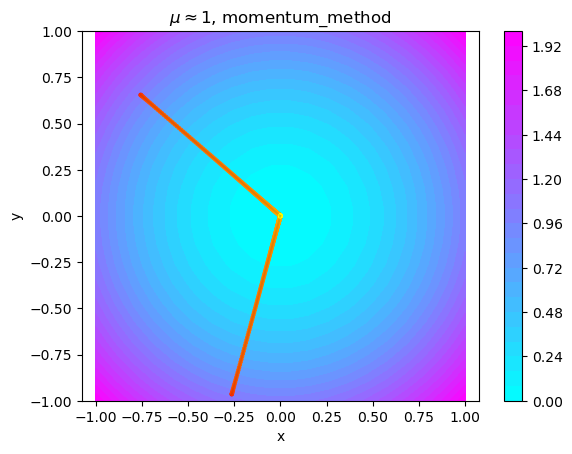

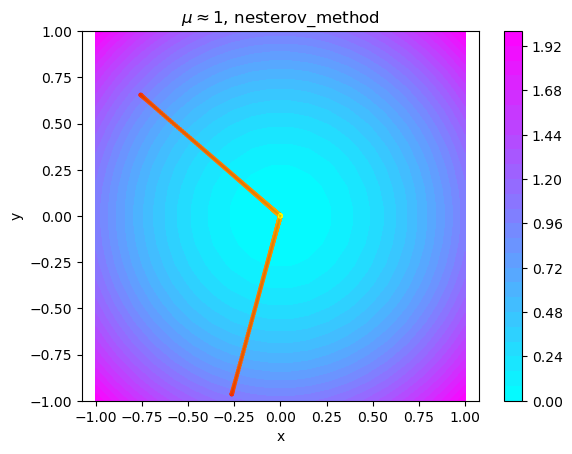

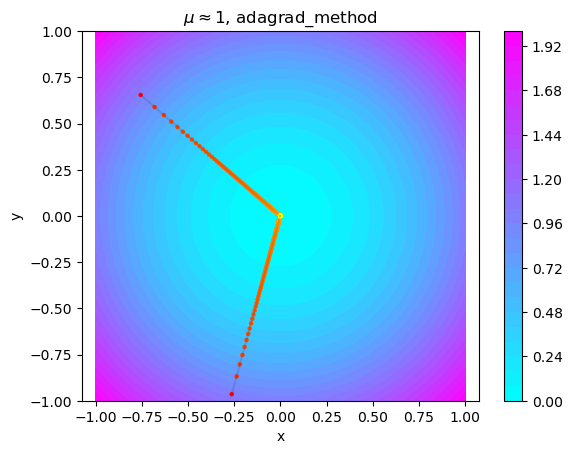

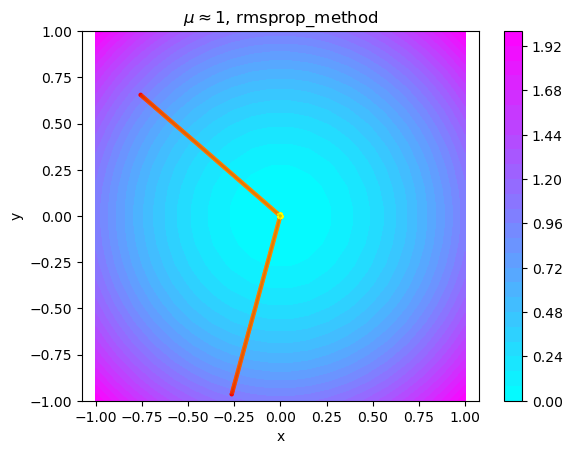

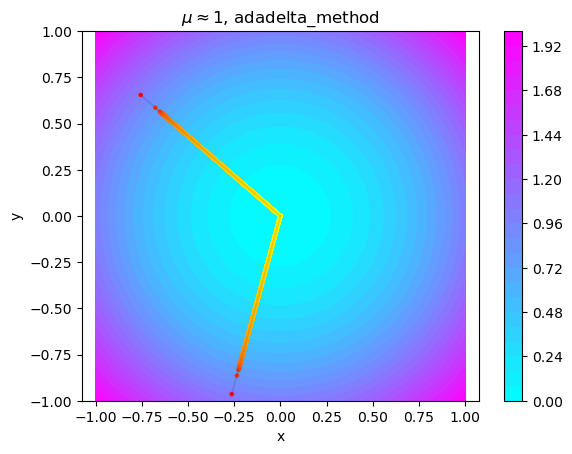

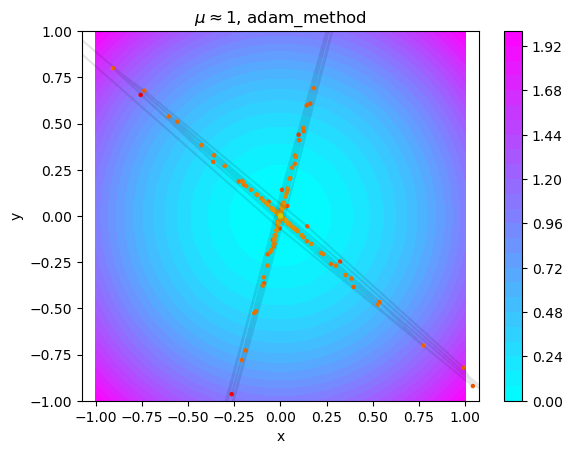

eps  momentum_method (accuracy)  momentum_method (iters)  \
0   1.000000e-01                9.940352e-02                      101   
1   3.359818e-02                3.312394e-02                      142   
2   1.128838e-02                1.102175e-02                      183   
3   3.792690e-03                3.766820e-03                      223   
4   1.274275e-03                1.253230e-03                      264   
5   4.281332e-04                4.226144e-04                      304   
6   1.438450e-04                1.424936e-04                      345   
7   4.832930e-05                4.740774e-05                      386   
8   1.623777e-05                1.620170e-05                      426   
9   5.455595e-06                5.390320e-06                      467   
10  1.832981e-06                1.793365e-06                      508   
11  6.158482e-07                6.128862e-07                      548   
12  2.069138e-07                2.039078e-07                      589   
13  6.951928e-08                6.784033e-08                      630   
14  2.335721e-08                2.318458e-08                      670   
15  7.847600e-09                7.713533e-09                      711   
16  2.636651e-09                2.601162e-09                      751   
17  8.858668e-10                8.770385e-10                      792   
18  2.976351e-10                2.917916e-10                      833   
19  1.000000e-10                9.972040e-11                      873   

    momentum_method (calls)  momentum_method (grads)  \
0                         0                      101   
1                         0                      142   
2                         0                      183   
3                         0                      223   
4                         0                      264   
5                         0                      304   
6                         0                      345   
7                         0                      386   
8                         0                      426   
9                         0                      467   
10                        0                      508   
11                        0                      548   
12                        0                      589   
13                        0                      630   
14                        0                      670   
15                        0                      711   
16                        0                      751   
17                        0                      792   
18                        0                      833   
19                        0                      873   

    nesterov_method (accuracy)  nesterov_method (iters)  \
0                 9.788968e-02                      104   
1                 3.283312e-02                      146   
2                 1.114703e-02                      187   
3                 3.783632e-03                      229   
4                 1.267777e-03                      271   
5                 4.247909e-04                      313   
6                 1.423337e-04                      355   
7                 4.769144e-05                      397   
8                 1.597986e-05                      439   
9                 5.354334e-06                      481   
10                1.794064e-06                      523   
11                6.011328e-07                      565   
12                2.067328e-07                      606   
13                6.926946e-08                      648   
14                2.320996e-08                      690   
15                7.776906e-09                      732   
16                2.605790e-09                      774   
17                8.731158e-10                      816   
18                2.925529e-10                      858   
19                9.802501e-11                      900   

    nesterov_method (calls)  nesterov_method (grads)  \
0     

/tmp/ipykernel_50911/4192240177.py:157: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


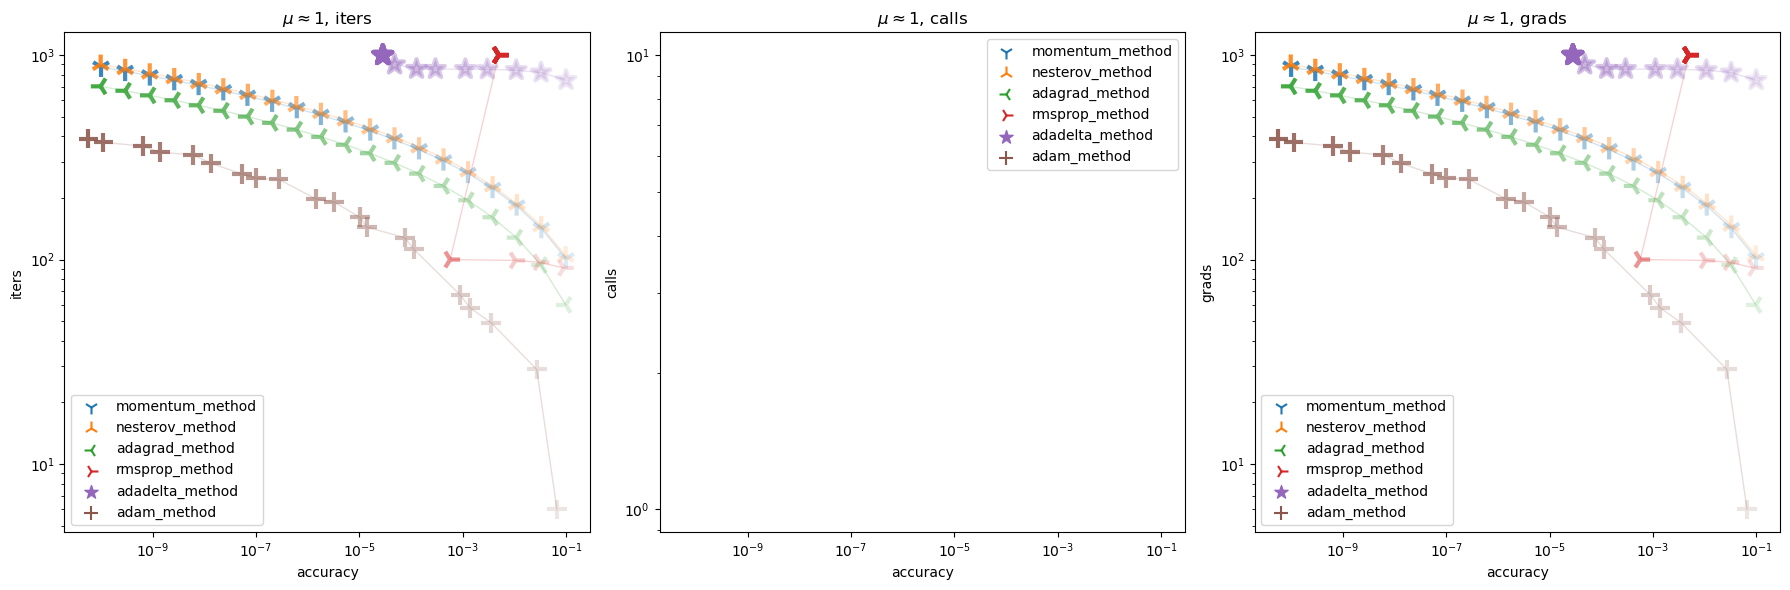

/tmp/ipykernel_50911/4192240177.py:202: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


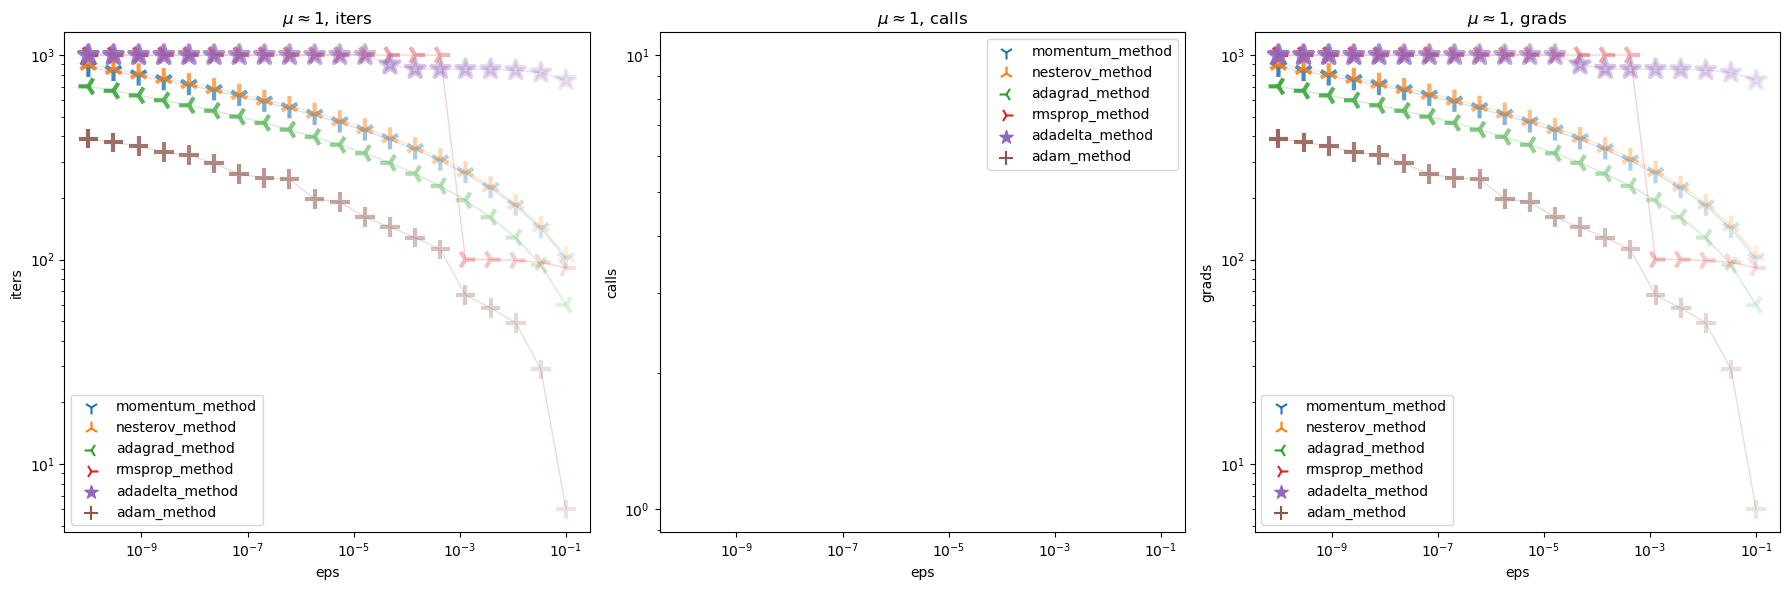

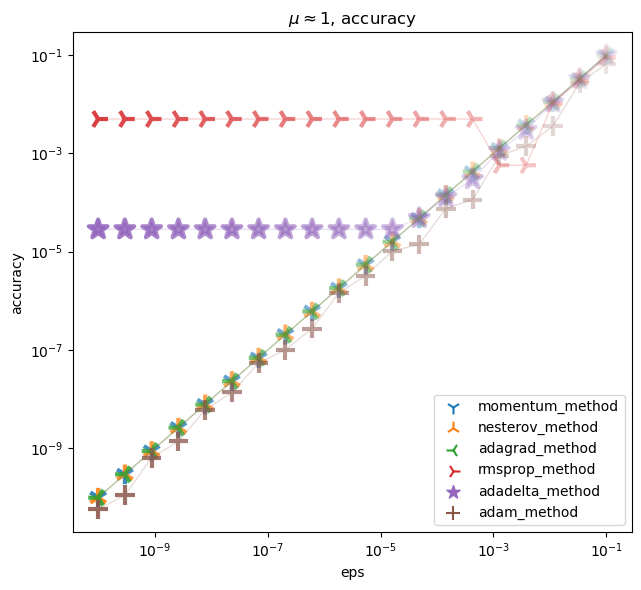

$\mu \approx 10$

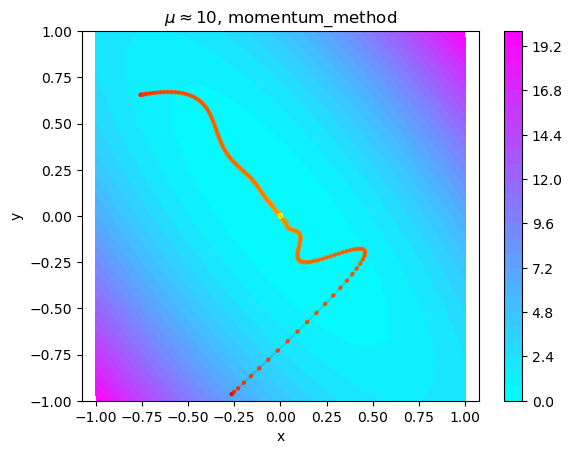

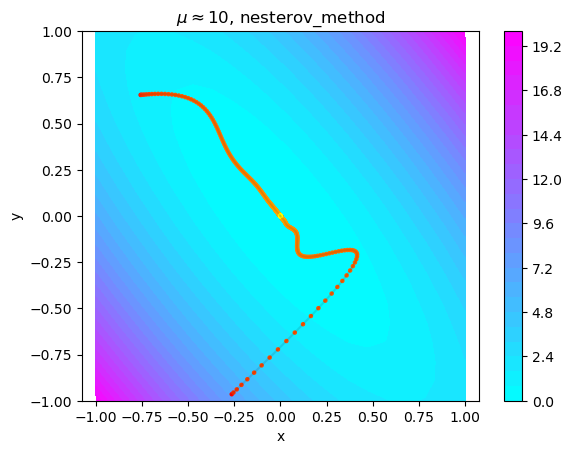

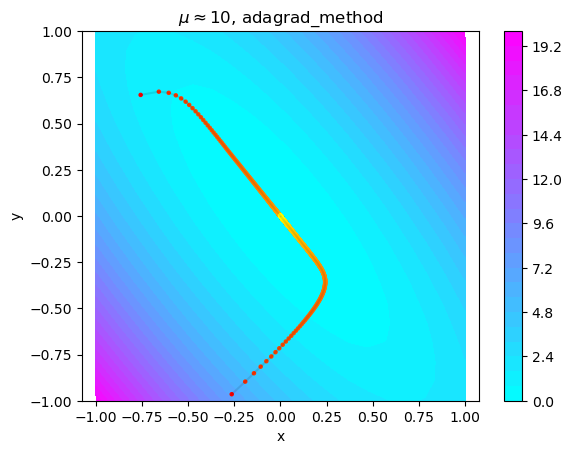

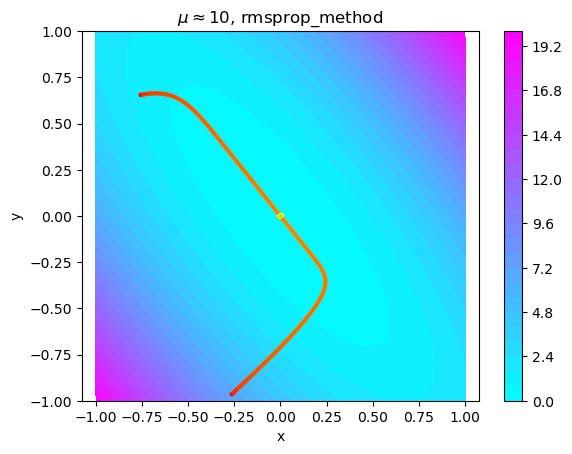

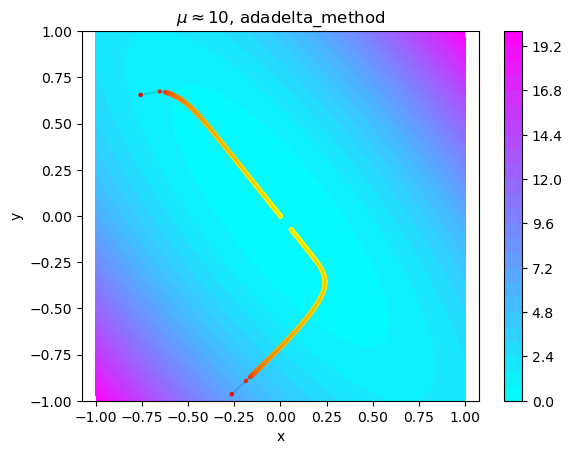

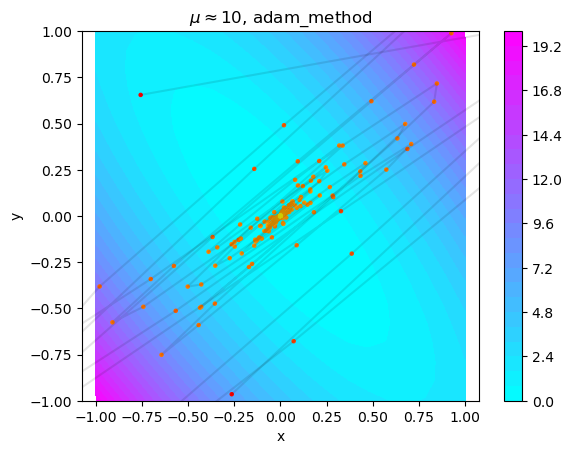

eps  momentum_method (accuracy)  momentum_method (iters)  \
0   1.000000e-01                9.886480e-02                       91   
1   3.359818e-02                3.299458e-02                      132   
2   1.128838e-02                1.112697e-02                      172   
3   3.792690e-03                3.752073e-03                      213   
4   1.274275e-03                1.248343e-03                      254   
5   4.281332e-04                4.209412e-04                      294   
6   1.438450e-04                1.419388e-04                      335   
7   4.832930e-05                4.786157e-05                      375   
8   1.623777e-05                1.592359e-05                      416   
9   5.455595e-06                5.369336e-06                      457   
10  1.832981e-06                1.810532e-06                      497   
11  6.158482e-07                6.105003e-07                      538   
12  2.069138e-07                2.031141e-07                      579   
13  6.951928e-08                6.848977e-08                      619   
14  2.335721e-08                2.309433e-08                      660   
15  7.847600e-09                7.787374e-09                      700   
16  2.636651e-09                2.590867e-09                      741   
17  8.858668e-10                8.736243e-10                      782   
18  2.976351e-10                2.945849e-10                      822   
19  1.000000e-10                9.933220e-11                      863   

    momentum_method (calls)  momentum_method (grads)  \
0                         0                       91   
1                         0                      132   
2                         0                      172   
3                         0                      213   
4                         0                      254   
5                         0                      294   
6                         0                      335   
7                         0                      375   
8                         0                      416   
9                         0                      457   
10                        0                      497   
11                        0                      538   
12                        0                      579   
13                        0                      619   
14                        0                      660   
15                        0                      700   
16                        0                      741   
17                        0                      782   
18                        0                      822   
19                        0                      863   

    nesterov_method (accuracy)  nesterov_method (iters)  \
0                 9.825839e-02                       93   
1                 3.338040e-02                      135   
2                 1.118695e-02                      177   
3                 3.748535e-03                      219   
4                 1.256013e-03                      261   
5                 4.208494e-04                      303   
6                 1.410128e-04                      345   
7                 4.786835e-05                      386   
8                 1.603914e-05                      428   
9                 5.374196e-06                      470   
10                1.800719e-06                      512   
11                6.112622e-07                      554   
12                2.048142e-07                      596   
13                6.862661e-08                      638   
14                2.299456e-08                      680   
15                7.704733e-09                      722   
16                2.615456e-09                      763   
17                8.763548e-10                      805   
18                2.936381e-10                      847   
19                9.838864e-11                      889   

    nesterov_method (calls)  nesterov_method (grads)  \
0     

/tmp/ipykernel_50911/4192240177.py:157: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


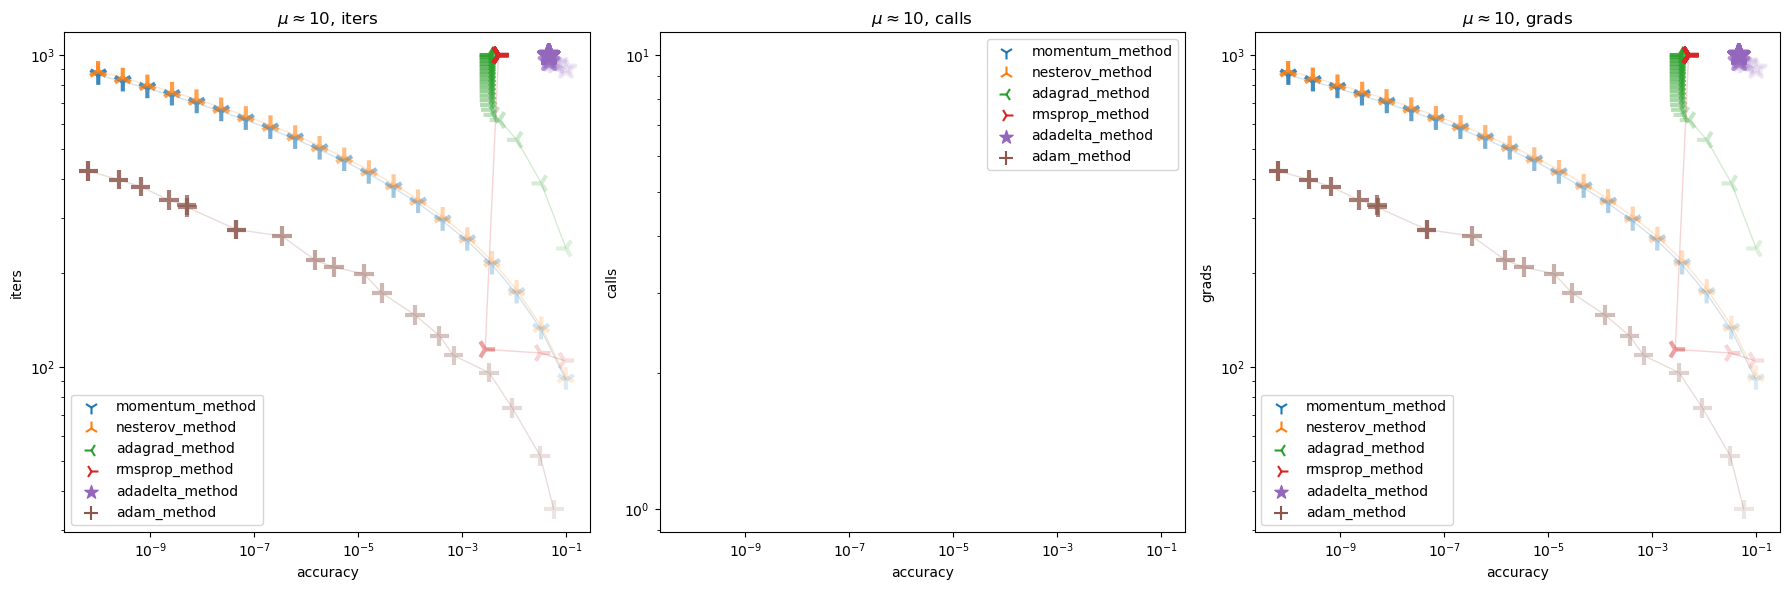

/tmp/ipykernel_50911/4192240177.py:202: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


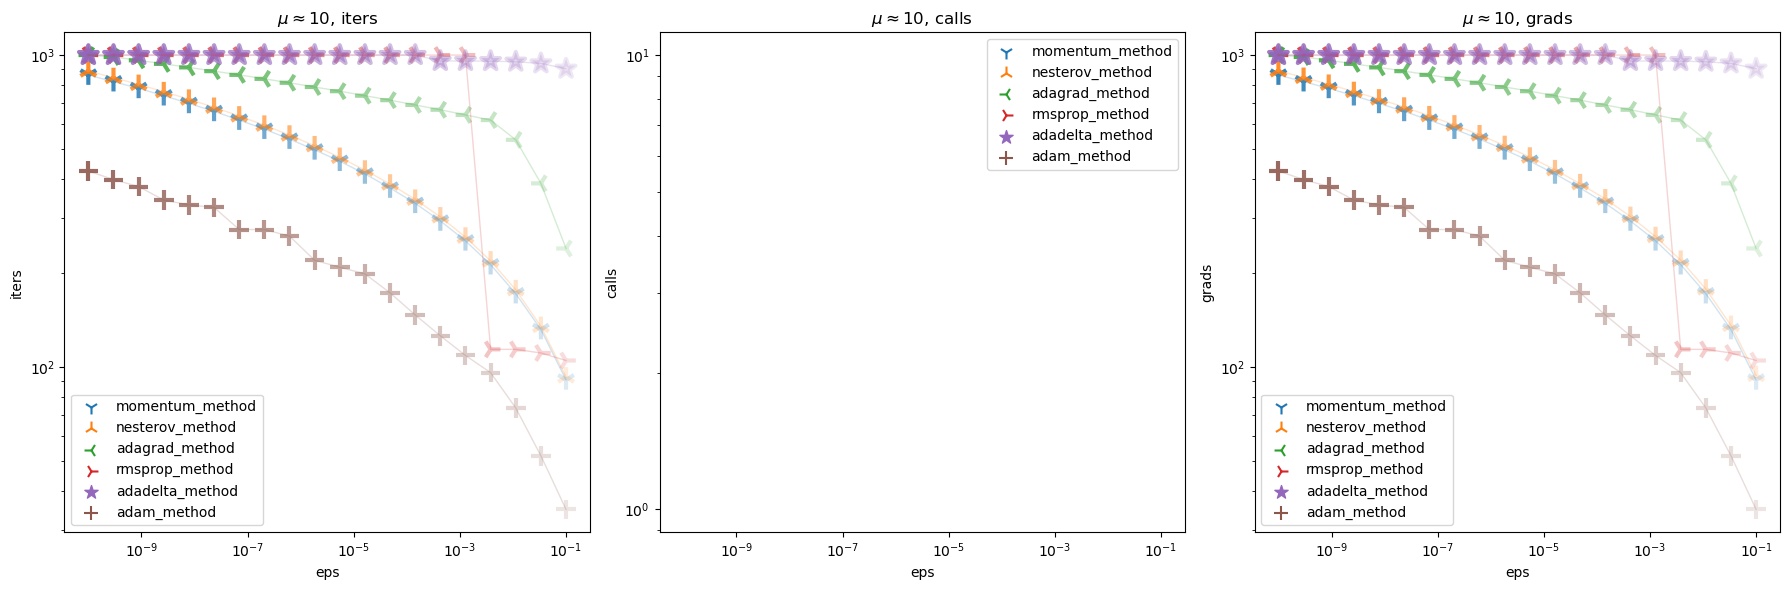

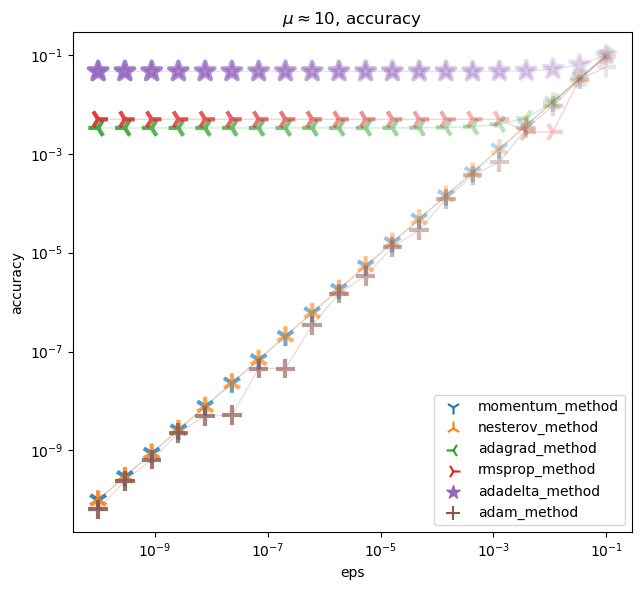

Rosenbrock

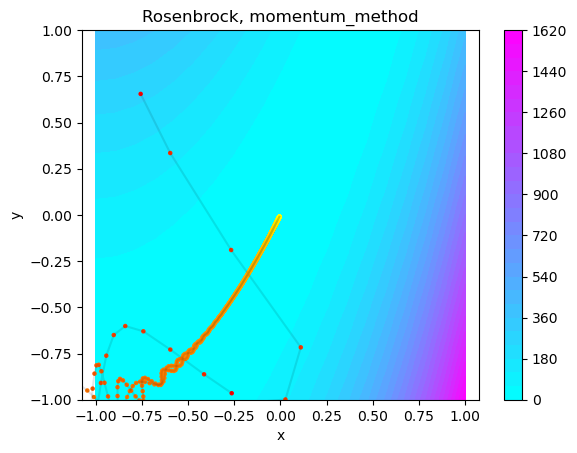

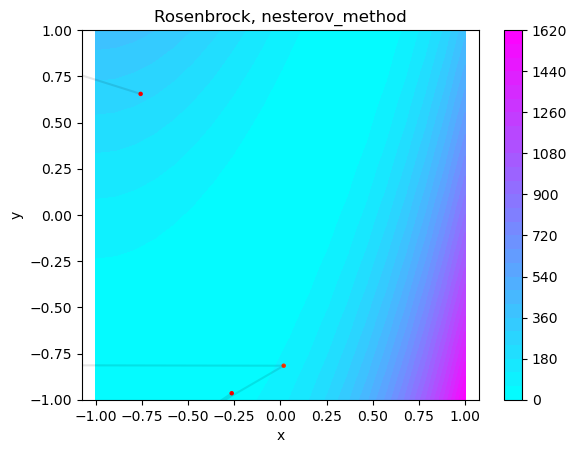

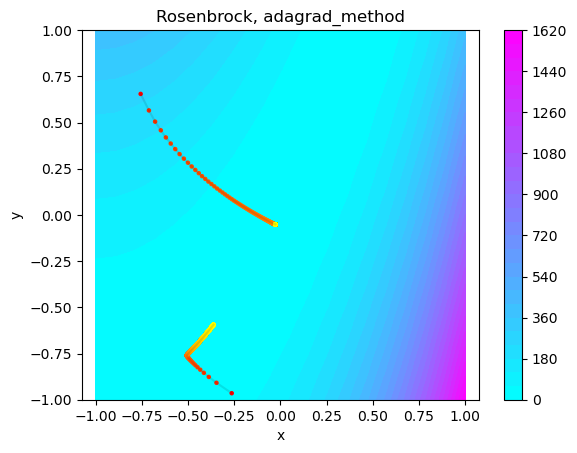

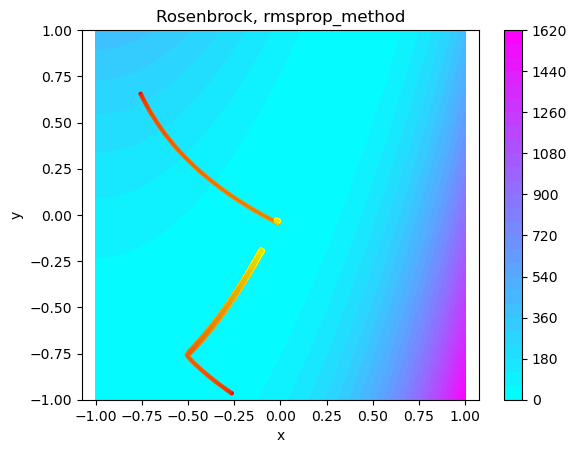

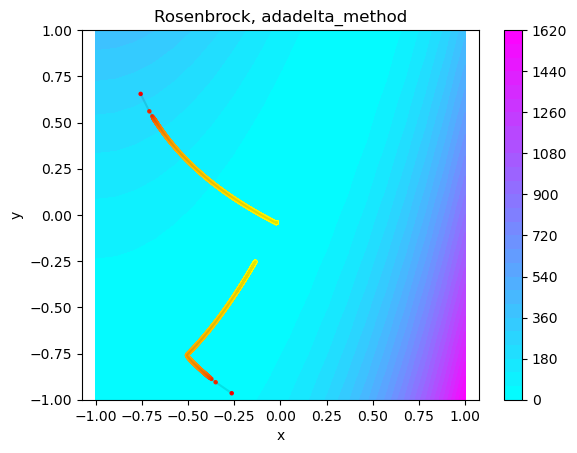

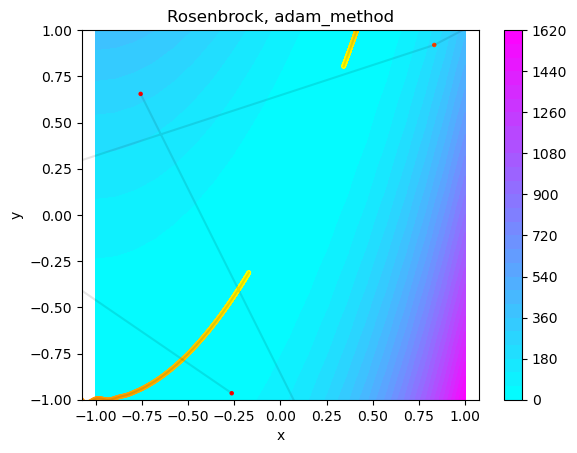

eps  momentum_method (accuracy)  momentum_method (iters)  \
0   1.000000e-01                    0.099598                      489   
1   3.359818e-02                    0.033469                      742   
2   1.128838e-02                    0.011352                      999   
3   3.792690e-03                    0.011328                     1000   
4   1.274275e-03                    0.011328                     1000   
5   4.281332e-04                    0.011328                     1000   
6   1.438450e-04                    0.011328                     1000   
7   4.832930e-05                    0.011328                     1000   
8   1.623777e-05                    0.011328                     1000   
9   5.455595e-06                    0.011328                     1000   
10  1.832981e-06                    0.011328                     1000   
11  6.158482e-07                    0.011328                     1000   
12  2.069138e-07                    0.011328                     1000   
13  6.951928e-08                    0.011328                     1000   
14  2.335721e-08                    0.011328                     1000   
15  7.847600e-09                    0.011328                     1000   
16  2.636651e-09                    0.011328                     1000   
17  8.858668e-10                    0.011328                     1000   
18  2.976351e-10                    0.011328                     1000   
19  1.000000e-10                    0.011328                     1000   

    momentum_method (calls)  momentum_method (grads)  \
0                         0                      489   
1                         0                      742   
2                         0                      999   
3                         0                     1000   
4                         0                     1000   
5                         0                     1000   
6                         0                     1000   
7                         0                     1000   
8                         0                     1000   
9                         0                     1000   
10                        0                     1000   
11                        0                     1000   
12                        0                     1000   
13                        0                     1000   
14                        0                     1000   
15                        0                     1000   
16                        0                     1000   
17                        0                     1000   
18                        0                     1000   
19                        0                     1000   

    nesterov_method (accuracy)  nesterov_method (iters)  \
0                   969.586081                     1000   
1                   969.586081                     1000   
2                   969.586081                     1000   
3                   969.586081                     1000   
4                   969.586081                     1000   
5                   969.586081                     1000   
6                   969.586081                     1000   
7                   969.586081                     1000   
8                   969.586081                     1000   
9                   969.586081                     1000   
10                  969.586081                     1000   
11                  969.586081                     1000   
12                  969.586081                     1000   
13                  969.586081                     1000   
14                  969.586081                     1000   
15                  969.586081                     1000   
16                  969.586081                     1000   
17                  969.586081                     1000   
18                  969.586081                     1000   
19                  969.586081                     1000   

    nesterov_method (calls)  nesterov_method (grads)  \
0     

/tmp/ipykernel_50911/4192240177.py:157: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


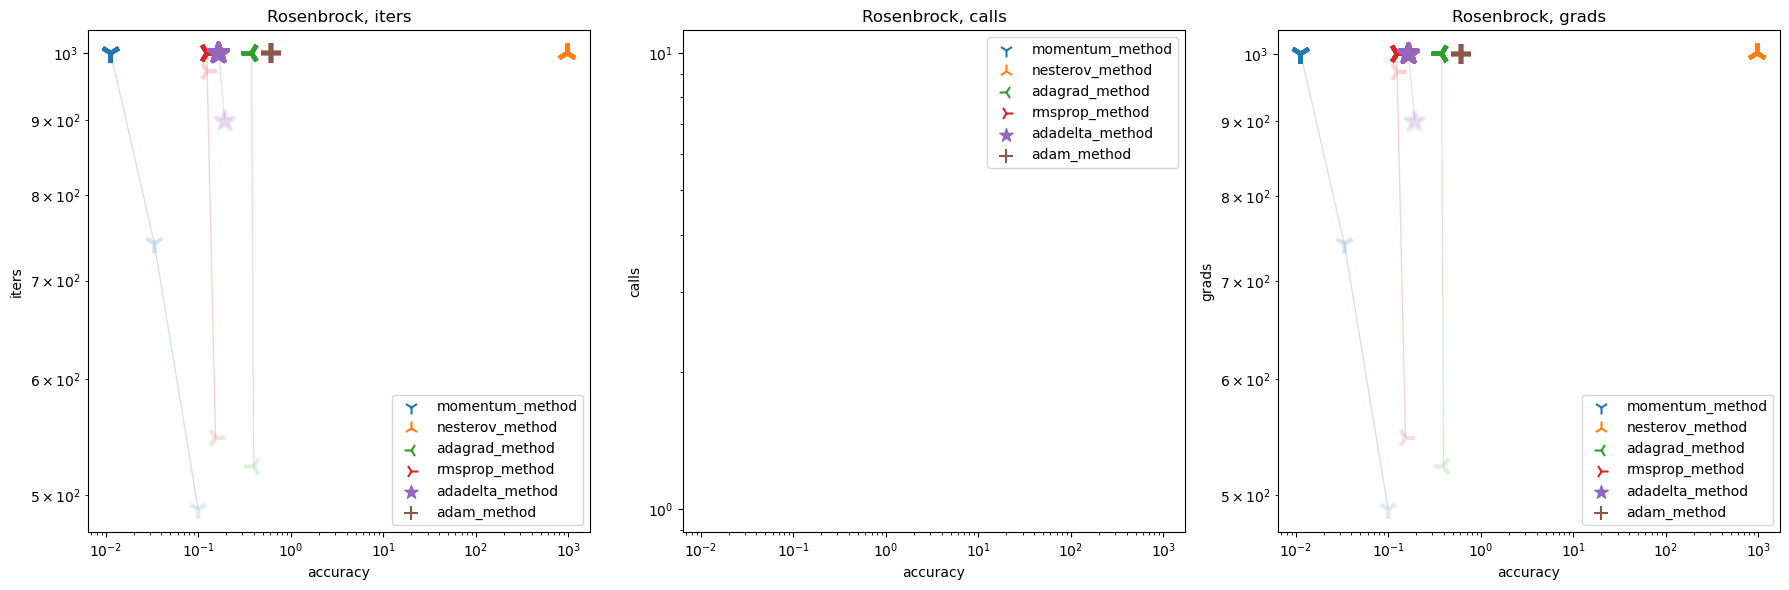

/tmp/ipykernel_50911/4192240177.py:202: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


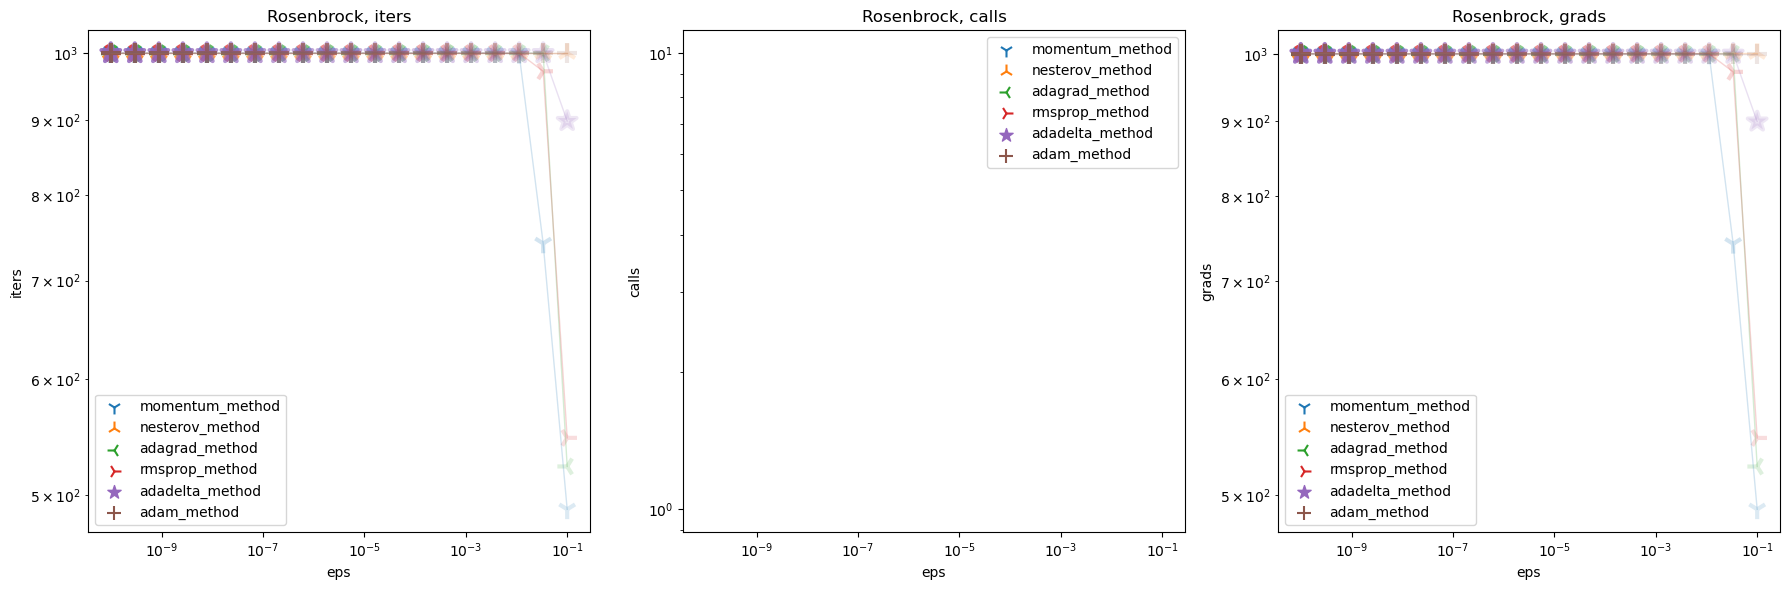

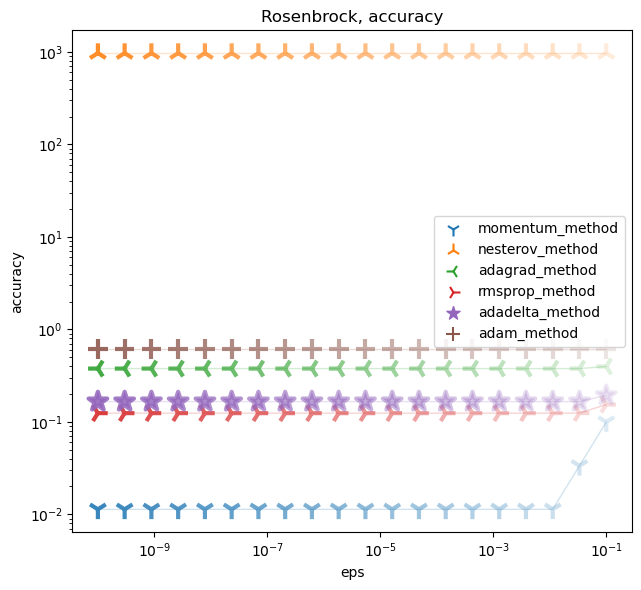

In [31]:
# a, b
functions = [
    (f_a, r"$\mu \approx 1$"),
    (f_b, r"$\mu \approx 10$"),
    (f_c, "Rosenbrock"),
]


methods = [
    (momentum_method, "momentum_method"),
    (nesterov_method, "nesterov_method"),
    (adagrad_method, "adagrad_method"),
    (rmsprop_method, "rmsprop_method"),
    (adadelta_method, "adadelta_method"),
    (adam_method, "adam_method"),
]


def make_tables(
    functions: list[tuple[Callable, str]],
    methods: list[tuple[Callable, str]],
    contour: bool = False,
    plot_tables: bool = False,
):
    num_of_random_points = 2
    radius = 1
    n_countour_points = 20
    levels = 30
    EPS = np.logspace(-1, -10, 20)
    xlim = [-1, 1]
    ylim = [-1, 1]
    random_points = [
        np.array(
            [
                np.cos(random_alpha * 2 * np.pi) * radius + (xlim[1] + xlim[0]) / 2,
                np.sin(random_alpha * 2 * np.pi) * radius + (ylim[1] + ylim[0]) / 2,
            ]
        )
        for random_alpha in np.random.random(num_of_random_points)
    ]

    for f, f_name in functions:
        print()
        print()
        display(Markdown(f_name))
        data = dict()
        data["eps"] = EPS
        for method, method_name in methods:

            def plot_contours():
                plt.title(f_name + ", " + method_name)
                plt.xlabel("x")
                plt.ylabel("y")
                xl = np.linspace(xlim[0], xlim[1], n_countour_points)
                yl = np.linspace(ylim[0], ylim[1], n_countour_points)
                x, y = np.meshgrid(xl, yl)
                z = 0 * x * y
                for qx, xp in enumerate(xl):
                    for qy, yp in enumerate(yl):
                        p = np.array([xp, yp])
                        # print(p)
                        z[qy, qx] = f(p)
                # plt.grid()
                plt.axis("equal")
                if contour:
                    plt.contour(x, y, z, levels=levels, cmap="cool")
                else:
                    plt.contourf(x, y, z, levels=levels, cmap="cool")
                plt.colorbar()

            plot_contours()
            acc_total, iters_total, calls_total, grad_total = [], [], [], []
            for ideps, eps in enumerate(EPS):
                acc_multipoint, iters_multipoint, calls_multipoint, grad_multipoint = (
                    [],
                    [],
                    [],
                    [],
                )
                for point in random_points:
                    # solve
                    p = point.copy()
                    result, iters, calls, grad_calls, trajectory = method(
                        f, p, eps=eps, info=True
                    )
                    if ideps + 1 == len(EPS):
                        trajectory = np.array(trajectory)
                        x, y = trajectory.T[0], trajectory.T[1]
                        # print(x[0],y[0])
                        x, y = x, y
                        c = [(q / len(x)) ** 0.25 for q in range(len(x))]
                        plt.plot(x, y, color="black", alpha=0.1)
                        plt.scatter(x, y, c=c, s=5, cmap="autumn")
                    acc_multipoint.append(
                        np.linalg.norm(result - np.zeros_like(result))
                    )
                    iters_multipoint.append(iters)
                    calls_multipoint.append(calls)
                    grad_multipoint.append(grad_calls)
                acc_total.append(np.mean(acc_multipoint))
                iters_total.append(int(np.mean(iters_multipoint)))
                calls_total.append(int(np.mean(calls_multipoint)))
                grad_total.append(int(np.mean(grad_multipoint)))
            plt.xlim(xlim)
            plt.ylim(ylim)
            plt.show()
            data[method_name + " (accuracy)"] = acc_total
            data[method_name + " (iters)"] = iters_total
            data[method_name + " (calls)"] = calls_total
            data[method_name + " (grads)"] = grad_total
        data = pd.DataFrame(data)
        display(data)
        if plot_tables:
            # accuracy
            plt.figure(figsize=(18, 6))
            for plot_idx, plot_type in enumerate(["iters", "calls", "grads"]):
                plt.subplot(1, 3, plot_idx + 1)
                plt.title(f_name + ", " + plot_type)
                for method_id, (method, method_name) in enumerate(methods):
                    alpha = [
                        (0.2 + idx / len(data[method_name + f" ({plot_type})"])) / 1.3
                        for idx, d in enumerate(data[method_name + f" ({plot_type})"])
                    ]
                    (c,) = plt.plot([], [])
                    c = c.get_color()
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore")
                        plt.scatter(
                            [],
                            [],
                            label=method_name,
                            marker=str(method_id + 1) if method_id < 4 else ["+",'*'][method_id-5],
                            s=100,
                            c=c,
                        )
                        plt.scatter(
                            data[method_name + " (accuracy)"],
                            data[method_name + f" ({plot_type})"],
                            marker=str(method_id + 1) if method_id < 4 else ["+",'*'][method_id-5],
                            alpha=alpha,
                            s=200,
                            c=c,
                            lw=3,
                        )
                        plt.plot(
                            data[method_name + " (accuracy)"],
                            data[method_name + f" ({plot_type})"],
                            alpha=0.2,
                            c=c,
                            lw=1,
                        )
                        plt.xscale("log")
                        plt.yscale("log")
                plt.xlabel("accuracy")
                plt.ylabel(plot_type)
                plt.legend()
            plt.tight_layout()
            plt.show()
            # eps
            plt.figure(figsize=(18, 6))
            for plot_idx, plot_type in enumerate(["iters", "calls", "grads"]):
                plt.subplot(1, 3, plot_idx + 1)
                plt.title(f_name + ", " + plot_type)
                for method_id, (method, method_name) in enumerate(methods):
                    alpha = [
                        (0.2 + idx / len(data[method_name + f" ({plot_type})"])) / 1.3
                        for idx, d in enumerate(data[method_name + f" ({plot_type})"])
                    ]
                    (c,) = plt.plot([], [])
                    c = c.get_color()
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore")
                        plt.scatter(
                            [],
                            [],
                            label=method_name,
                            marker=str(method_id + 1) if method_id < 4 else ["+",'*'][method_id-5],
                            s=100,
                            c=c,
                        )
                        plt.scatter(
                            data["eps"],
                            data[method_name + f" ({plot_type})"],
                            marker=str(method_id + 1) if method_id < 4 else ["+",'*'][method_id-5],
                            alpha=alpha,
                            s=200,
                            c=c,
                            lw=3,
                        )
                        plt.plot(
                            data["eps"],
                            data[method_name + f" ({plot_type})"],
                            alpha=0.2,
                            c=c,
                            lw=1,
                        )
                        plt.xscale("log")
                        plt.yscale("log")
                plt.xlabel("eps")
                plt.ylabel(plot_type)
                plt.legend()
            plt.tight_layout()
            plt.show()
            # eps vs accuracy
            plt.figure(figsize=(18, 6))
            for plot_idx, plot_type in enumerate(["accuracy"]):
                plt.subplot(1, 3, plot_idx + 1)
                plt.title(f_name + ", " + plot_type)
                for method_id, (method, method_name) in enumerate(methods):
                    alpha = [
                        (0.2 + idx / len(data[method_name + f" ({plot_type})"])) / 1.3
                        for idx, d in enumerate(data[method_name + f" ({plot_type})"])
                    ]
                    (c,) = plt.plot([], [])
                    c = c.get_color()
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore")
                        plt.scatter(
                            [],
                            [],
                            label=method_name,
                            marker=str(method_id + 1) if method_id < 4 else ["+",'*'][method_id-5],
                            s=100,
                            c=c,
                        )
                        plt.scatter(
                            data["eps"],
                            data[method_name + f" ({plot_type})"],
                            marker=str(method_id + 1) if method_id < 4 else ["+",'*'][method_id-5],
                            alpha=alpha,
                            s=200,
                            c=c,
                            lw=3,
                        )
                        plt.plot(
                            data["eps"],
                            data[method_name + f" ({plot_type})"],
                            alpha=0.2,
                            c=c,
                            lw=1,
                        )
                        plt.xscale("log")
                        plt.yscale("log")
                plt.xlabel("eps")
                plt.ylabel(plot_type)
                plt.legend()
            plt.tight_layout()
            plt.show()


pd.set_option("display.max_columns", None)

make_tables(functions, methods, plot_tables=True)

#### 4

For the Rosenbrock function, plot and compare the trajectories of each method on the level line plot.


Rosenbrock

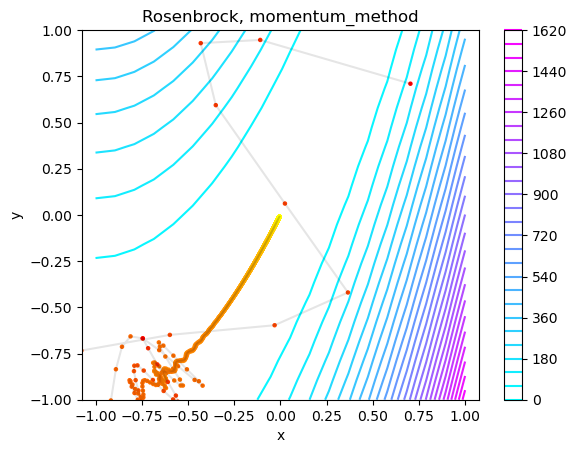

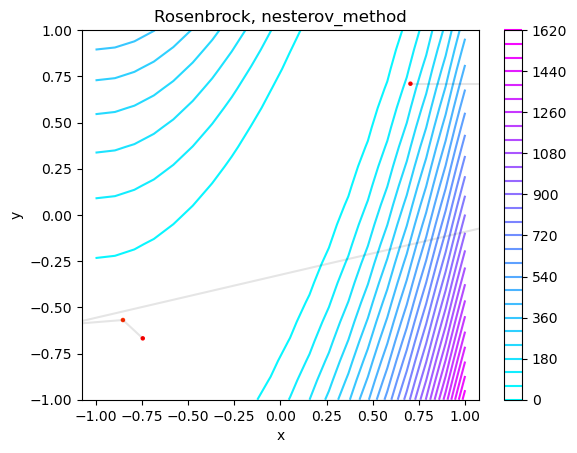

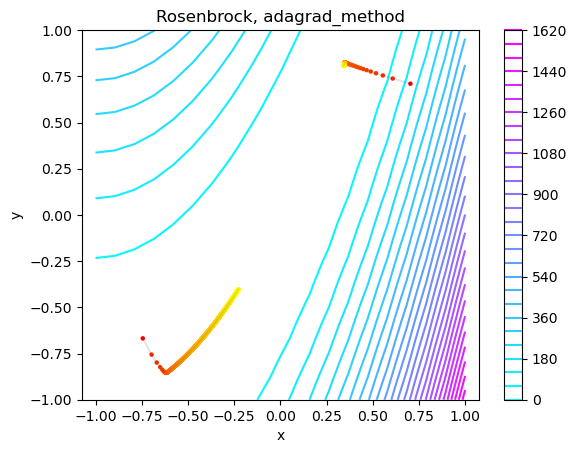

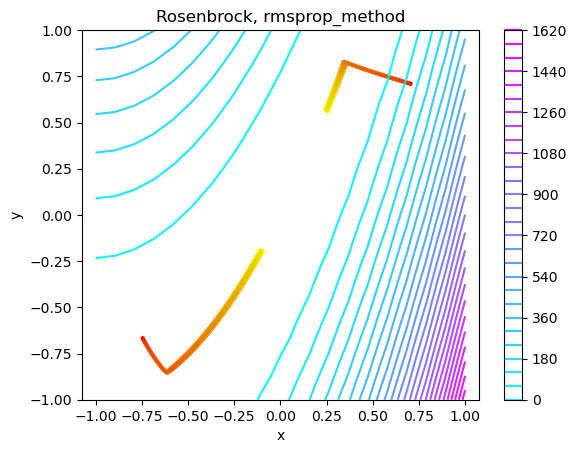

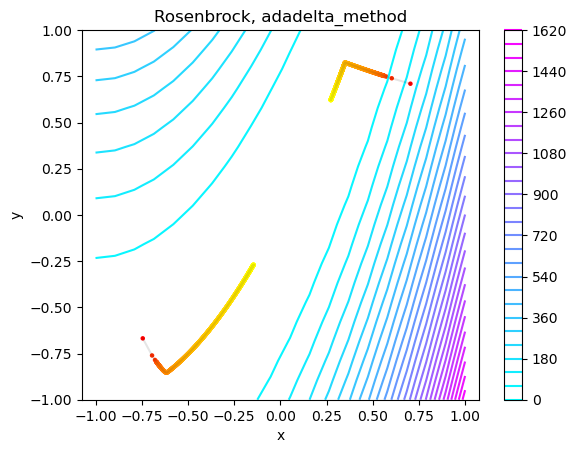

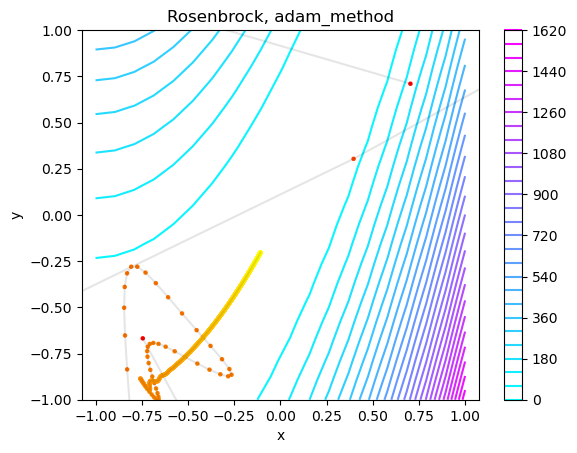

eps  momentum_method (accuracy)  momentum_method (iters)  \
0   1.000000e-01                    0.083218                      241   
1   3.359818e-02                    0.033510                      745   
2   1.128838e-02                    0.011706                      995   
3   3.792690e-03                    0.011497                     1000   
4   1.274275e-03                    0.011497                     1000   
5   4.281332e-04                    0.011497                     1000   
6   1.438450e-04                    0.011497                     1000   
7   4.832930e-05                    0.011497                     1000   
8   1.623777e-05                    0.011497                     1000   
9   5.455595e-06                    0.011497                     1000   
10  1.832981e-06                    0.011497                     1000   
11  6.158482e-07                    0.011497                     1000   
12  2.069138e-07                    0.011497                     1000   
13  6.951928e-08                    0.011497                     1000   
14  2.335721e-08                    0.011497                     1000   
15  7.847600e-09                    0.011497                     1000   
16  2.636651e-09                    0.011497                     1000   
17  8.858668e-10                    0.011497                     1000   
18  2.976351e-10                    0.011497                     1000   
19  1.000000e-10                    0.011497                     1000   

    momentum_method (calls)  momentum_method (grads)  \
0                         0                      241   
1                         0                      745   
2                         0                      995   
3                         0                     1000   
4                         0                     1000   
5                         0                     1000   
6                         0                     1000   
7                         0                     1000   
8                         0                     1000   
9                         0                     1000   
10                        0                     1000   
11                        0                     1000   
12                        0                     1000   
13                        0                     1000   
14                        0                     1000   
15                        0                     1000   
16                        0                     1000   
17                        0                     1000   
18                        0                     1000   
19                        0                     1000   

    nesterov_method (accuracy)  nesterov_method (iters)  \
0                  1869.955962                     1000   
1                  1869.955962                     1000   
2                  1869.955962                     1000   
3                  1869.955962                     1000   
4                  1869.955962                     1000   
5                  1869.955962                     1000   
6                  1869.955962                     1000   
7                  1869.955962                     1000   
8                  1869.955962                     1000   
9                  1869.955962                     1000   
10                 1869.955962                     1000   
11                 1869.955962                     1000   
12                 1869.955962                     1000   
13                 1869.955962                     1000   
14                 1869.955962                     1000   
15                 1869.955962                     1000   
16                 1869.955962                     1000   
17                 1869.955962                     1000   
18                 1869.955962                     1000   
19                 1869.955962                     1000   

    nesterov_method (calls)  nesterov_method (grads)  \
0     

/tmp/ipykernel_50911/4192240177.py:157: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


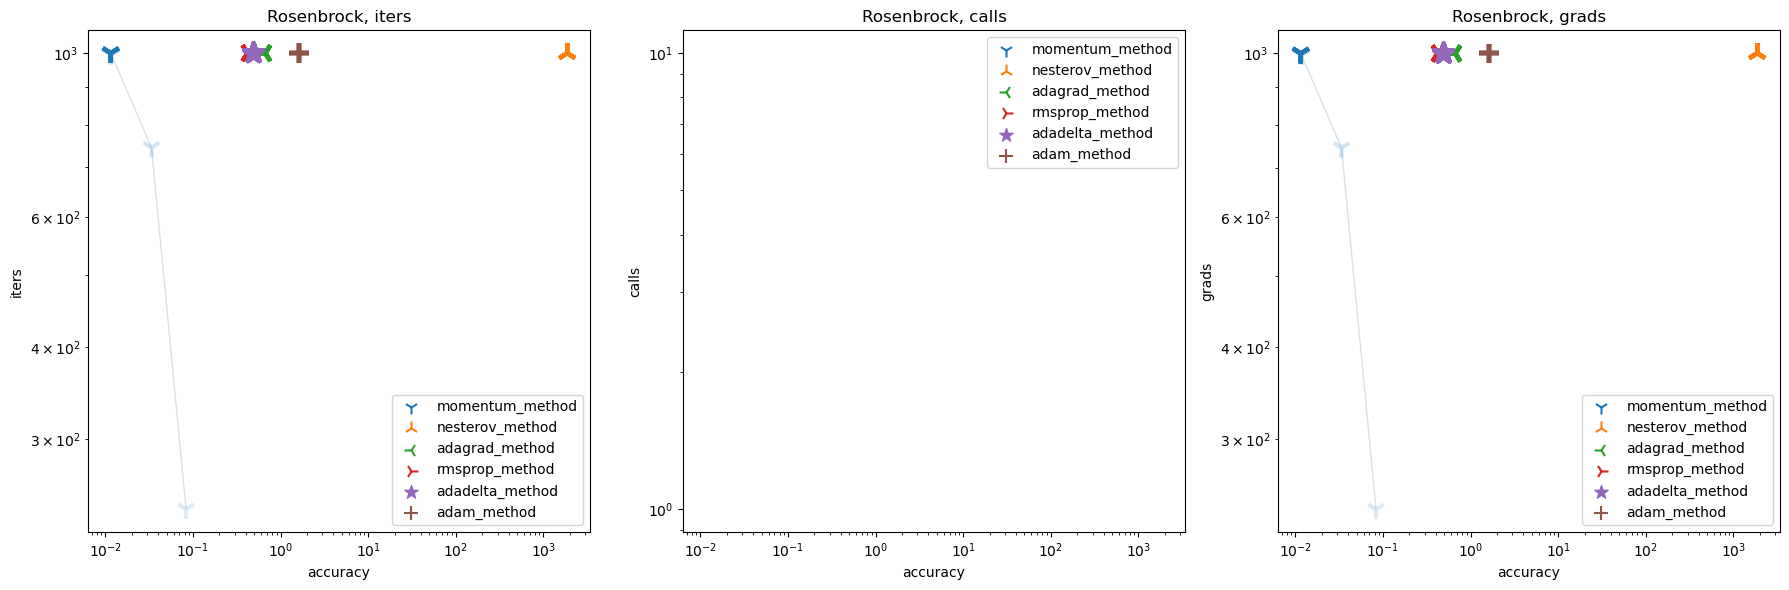

/tmp/ipykernel_50911/4192240177.py:202: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


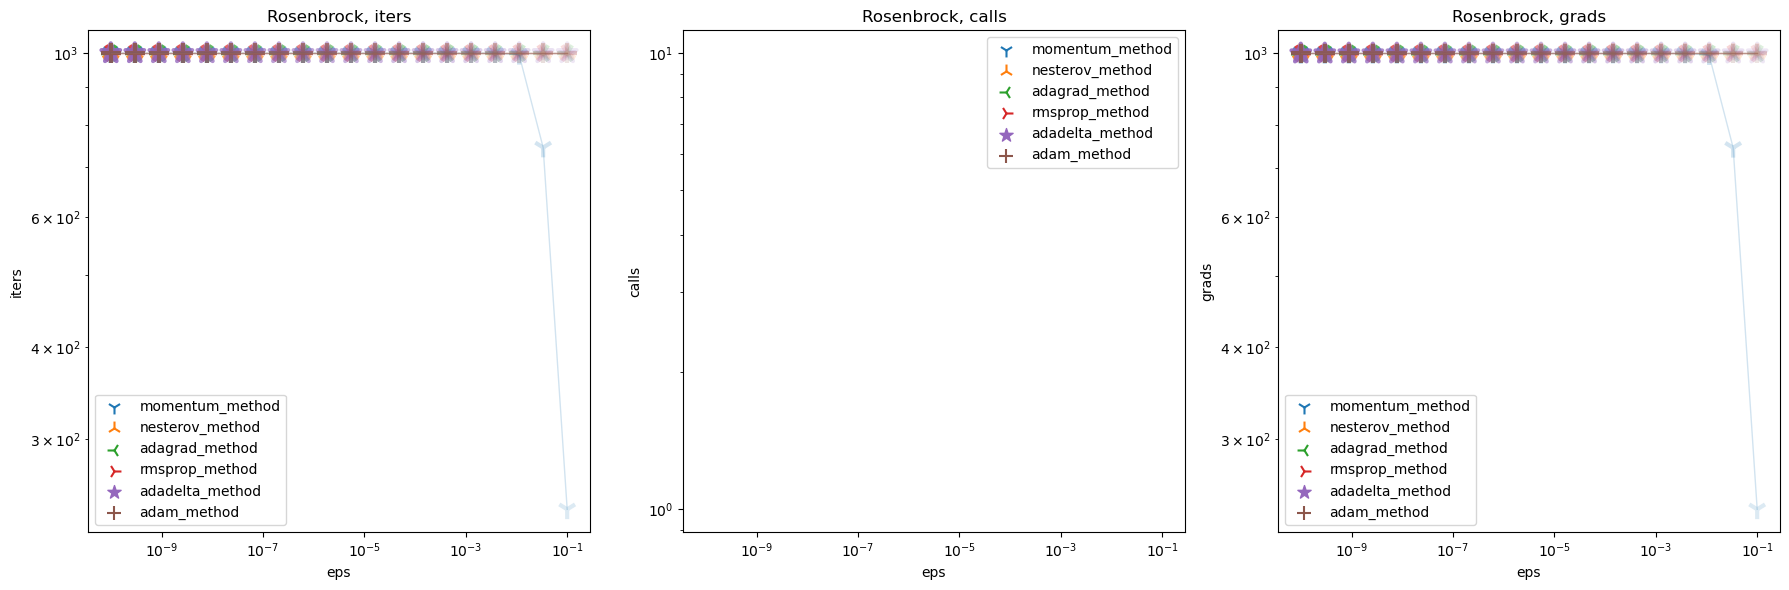

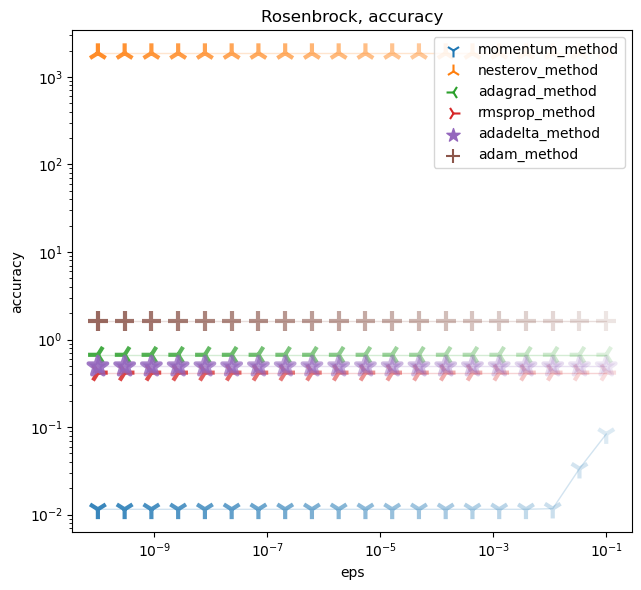

In [32]:
# just like the previous task, but with contour:
# a, b
functions = [
    (f_c, "Rosenbrock"),
]
methods = [
    (momentum_method, "momentum_method"),
    (nesterov_method, "nesterov_method"),
    (adagrad_method, "adagrad_method"),
    (rmsprop_method, "rmsprop_method"),
    (adadelta_method, "adadelta_method"),
    (adam_method, "adam_method"),
]


make_tables(functions, methods, plot_tables=True, contour=True)


#### 5

Implement a generator of quadratic functions of a given dimension and condition number. Investigate the dependence of the number of iterations that must be performed to achieve the selected accuracy, depending on these parameters. Consider this dependence for two gradient methods, one of which is (necessarily) the conjugate gradient method.


In [33]:
# creation of quadratic function
# with given condition number
# A should be positive-definite and simmetric for all methods to work
# thus,
# let A = (B.T + B)/2 (to be simmetric)
# Since it is known that G.T @ G is a positive definite matrix
# (if G is invertible),
# let B = G.T @ G
#
# To generate arbitrary invertable matrix G,
# it is enough to make a orthogonal transform of a diagonal matrix.
#
# To generate an arbitrary orthogonal transformation,
# QR decomposition of a real random matrix C can be used.


In [34]:
def generator(mu: float, n: int) -> Callable[[np.ndarray], float]:
    assert mu >= 1
    # c = 0 if mu > 1 else mu / 100
    if n < 1:
        return None
    if n == 1:
        return lambda x: mu * x
    w = np.sqrt(mu)
    D = np.diag([w] + list(np.random.random(n - 2) * (w - 1) + 1) + [1 if w > 1 else w])
    C = np.random.random((n, n))
    Q, R = np.linalg.qr(C)
    G = Q.T @ D @ Q
    B = G.T @ G
    A = (B.T + B) / 2
    # print(np.linalg.cond(A), mu, w)
    # print(A, D)
    if w >= 1:
        assert np.isclose(np.linalg.cond(A), mu)
    return lambda x: x.T @ A @ x


def test_generator():
    generator(1, 1)
    generator(2, 2)
    generator(3, 2)
    generator(4, 2)
    generator(4, 4)
    generator(1, 2)


test_generator()


In [35]:
methods = [
    (momentum_method, "momentum_method"),
    (adam_method, "adam_method"),
]



def investigate_iter_vs_accuracy(
    mus: list[float],
    methods: list[tuple[Callable, str]],
    contour: bool = False,
    plot_table: bool = False,
    plot_illustrations=False,
):
    num_of_random_points = 5
    radius = 1
    n_countour_points = 20
    levels = 30
    functions = [(generator(mu, 2), r"$\mu = " + str(mu) + "$") for mu in mus]
    eps = 1e-7
    xlim = [-1, 1]
    ylim = [-1, 1]
    random_points = [
        np.array(
            [
                np.cos(random_alpha * 2 * np.pi) * radius + (xlim[1] + xlim[0]) / 2,
                np.sin(random_alpha * 2 * np.pi) * radius + (ylim[1] + ylim[0]) / 2,
            ]
        )
        for random_alpha in np.random.random(num_of_random_points)
    ]

    data = dict()
    data["mus"] = mus
    for f, f_name in functions:
        if plot_illustrations:
            print()
            display(Markdown(f_name))
            plt.figure(figsize=(6 * len(methods), 6))
        for method_id, (method, method_name) in enumerate(methods):

            def plot_contours():
                plt.title(f_name + ", " + method_name)
                plt.xlabel("x")
                plt.ylabel("y")
                xl = np.linspace(xlim[0], xlim[1], n_countour_points)
                yl = np.linspace(ylim[0], ylim[1], n_countour_points)
                x, y = np.meshgrid(xl, yl)
                z = 0 * x * y
                for qx, xp in enumerate(xl):
                    for qy, yp in enumerate(yl):
                        p = np.array([xp, yp])
                        # print(p)
                        z[qy, qx] = f(p)
                # plt.grid()
                plt.axis("equal")
                if contour:
                    plt.contour(x, y, z, levels=levels, cmap="cool")
                else:
                    plt.contourf(x, y, z, levels=levels, cmap="cool")
                plt.colorbar()

            if plot_illustrations:
                plt.subplot(1, len(methods), method_id + 1)
                plot_contours()
            acc_multipoint, iters_multipoint, calls_multipoint, grad_multipoint = (
                [],
                [],
                [],
                [],
            )
            for point in random_points:
                # solve
                p = point.copy()
                result, iters, calls, grad_calls, trajectory = method(
                    f, p, eps=eps, info=True
                )
                if plot_illustrations:
                    trajectory = np.array(trajectory)
                    x, y = trajectory.T[0], trajectory.T[1]
                    # print(x[0],y[0])
                    x, y = x[::5], y[::5]
                    c = [(q / len(x)) ** 0.25 for q in range(len(x))]
                    plt.plot(x, y, color="black", alpha=0.1)
                    plt.scatter(x, y, c=c, cmap="autumn")
                acc_multipoint.append(np.linalg.norm(result - np.zeros_like(result)))
                iters_multipoint.append(iters)
                calls_multipoint.append(calls)
                grad_multipoint.append(grad_calls)
            acc_total = np.mean(acc_multipoint)
            iters_total = int(np.mean(iters_multipoint))
            calls_total = int(np.mean(calls_multipoint))
            grad_total = int(np.mean(grad_multipoint))
            if plot_illustrations:
                plt.xlim(xlim)
                plt.ylim(ylim)
            data.setdefault(method_name + " (accuracy)", []).append(acc_total)
            data.setdefault(method_name + " (iters)", []).append(iters_total)
            data.setdefault(method_name + " (calls)", []).append(calls_total)
            data.setdefault(method_name + " (grads)", []).append(grad_total)
        if plot_illustrations:
            plt.show()
    data = pd.DataFrame(data)
    display(data)
    if plot_table:
        # accuracy
        plt.figure(figsize=(18, 6))
        for plot_idx, plot_type in enumerate(["iters", "calls", "grads"]):
            plt.subplot(1, 3, plot_idx + 1)
            plt.title(plot_type)
            for method_id, (method, method_name) in enumerate(methods):
                alpha = [
                    (0.2 + idx / len(data[method_name + f" ({plot_type})"])) / 1.3
                    for idx, d in enumerate(data[method_name + f" ({plot_type})"])
                ]
                (c,) = plt.plot([], [])
                c = c.get_color()
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    plt.scatter(
                        [], [], label=method_name, marker=str(method_id + 1), s=100, c=c
                    )
                    plt.scatter(
                        data[method_name + " (accuracy)"],
                        data[method_name + f" ({plot_type})"],
                        marker=str(method_id + 1),
                        alpha=alpha,
                        s=200,
                        c=c,
                        lw=3,
                    )
                    plt.plot(
                        data[method_name + " (accuracy)"],
                        data[method_name + f" ({plot_type})"],
                        alpha=0.2,
                        c=c,
                        lw=1,
                    )
                    plt.xscale("log")
                    plt.yscale("log")
            plt.xlabel("accuracy")
            plt.ylabel(plot_type)
            plt.legend()
        plt.tight_layout()
        plt.show()
        # mus
        plt.figure(figsize=(18, 6))
        for plot_idx, plot_type in enumerate(["iters", "calls", "grads"]):
            plt.subplot(1, 3, plot_idx + 1)
            plt.title(plot_type)
            for method_id, (method, method_name) in enumerate(methods):
                alpha = [
                    (0.2 + idx / len(data[method_name + f" ({plot_type})"])) / 1.3
                    for idx, d in enumerate(data[method_name + f" ({plot_type})"])
                ]
                (c,) = plt.plot([], [])
                c = c.get_color()
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    plt.scatter(
                        [], [], label=method_name, marker=str(method_id + 1), s=100, c=c
                    )
                    plt.scatter(
                        data["mus"],
                        data[method_name + f" ({plot_type})"],
                        marker=str(method_id + 1),
                        alpha=alpha,
                        s=200,
                        c=c,
                        lw=3,
                    )
                    plt.plot(
                        data["mus"],
                        data[method_name + f" ({plot_type})"],
                        alpha=0.2,
                        c=c,
                        lw=1,
                    )
                    plt.xscale("log")
                    plt.yscale("log")
            plt.xlabel("mus")
            plt.ylabel(plot_type)
            plt.legend()
        plt.tight_layout()
        plt.show()
        # mus vs accuracy
        plt.figure(figsize=(18, 6))
        for plot_idx, plot_type in enumerate(["accuracy"]):
            plt.subplot(1, 3, plot_idx + 1)
            plt.title(plot_type)
            for method_id, (method, method_name) in enumerate(methods):
                alpha = [
                    (0.2 + idx / len(data[method_name + f" ({plot_type})"])) / 1.3
                    for idx, d in enumerate(data[method_name + f" ({plot_type})"])
                ]
                (c,) = plt.plot([], [])
                c = c.get_color()
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    plt.scatter(
                        [], [], label=method_name, marker=str(method_id + 1), s=100, c=c
                    )
                    plt.scatter(
                        data["mus"],
                        data[method_name + f" ({plot_type})"],
                        marker=str(method_id + 1),
                        alpha=alpha,
                        s=200,
                        c=c,
                        lw=3,
                    )
                    plt.plot(
                        data["mus"],
                        data[method_name + f" ({plot_type})"],
                        alpha=0.2,
                        c=c,
                        lw=1,
                    )
                    plt.xscale("log")
                    plt.yscale("log")
            plt.xlabel("mus")
            plt.ylabel(plot_type)
            plt.legend()
        plt.tight_layout()
        plt.show()


$\mu = 1.0$

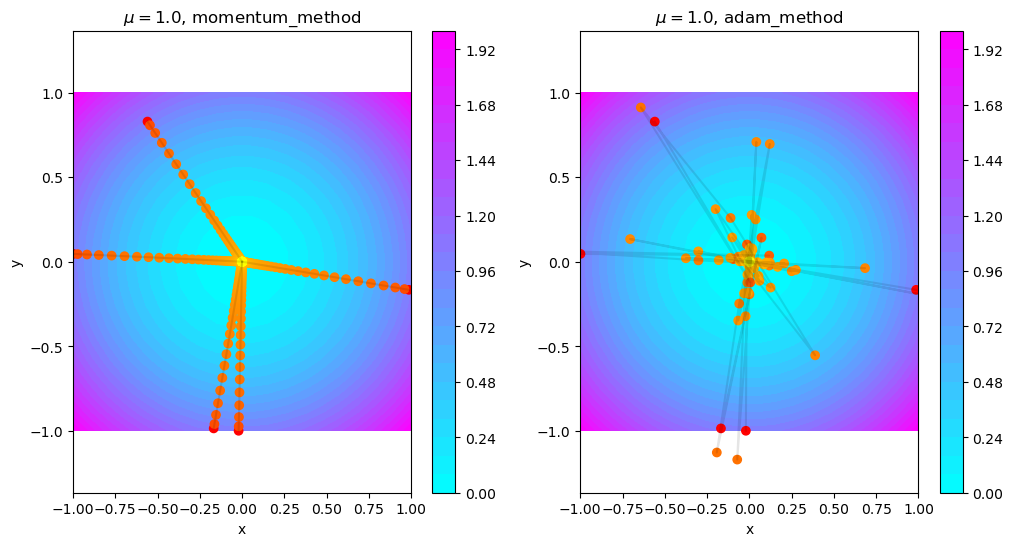

$\mu = 2.154434690031884$

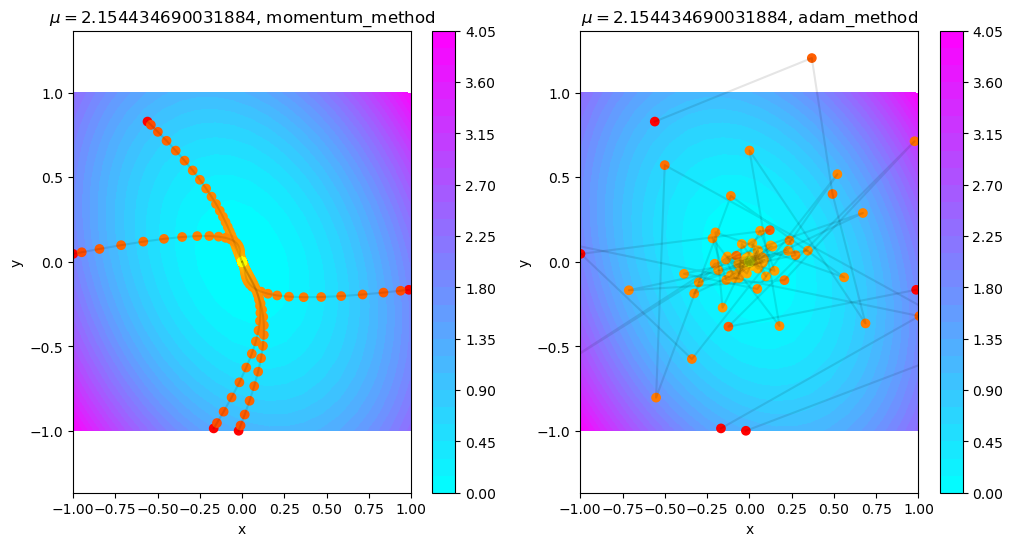

$\mu = 4.641588833612778$

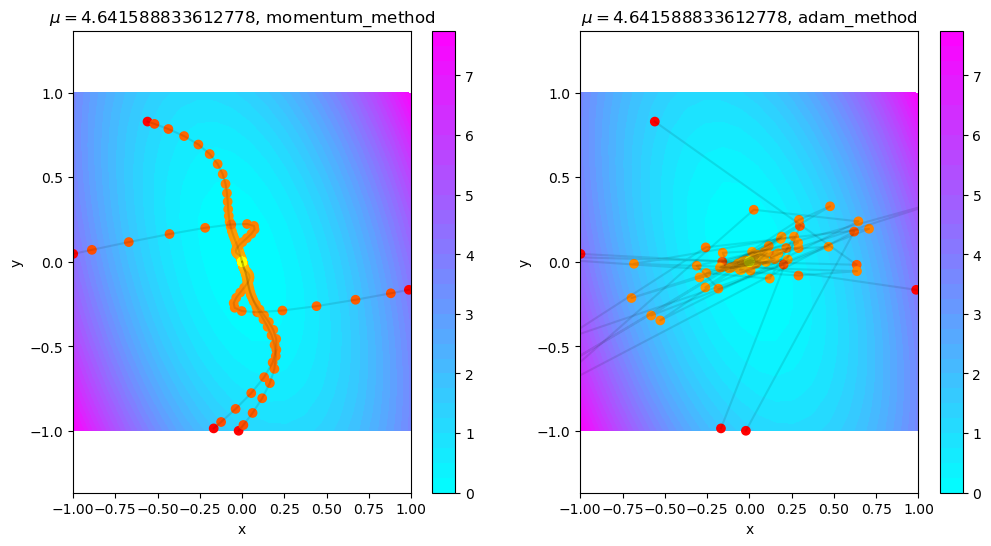

$\mu = 10.0$

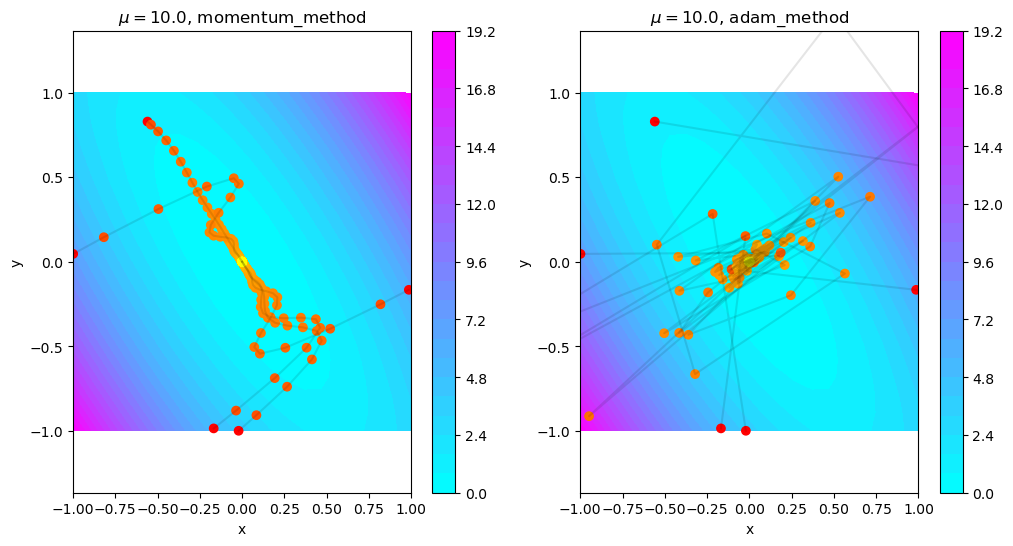

$\mu = 21.544346900318832$

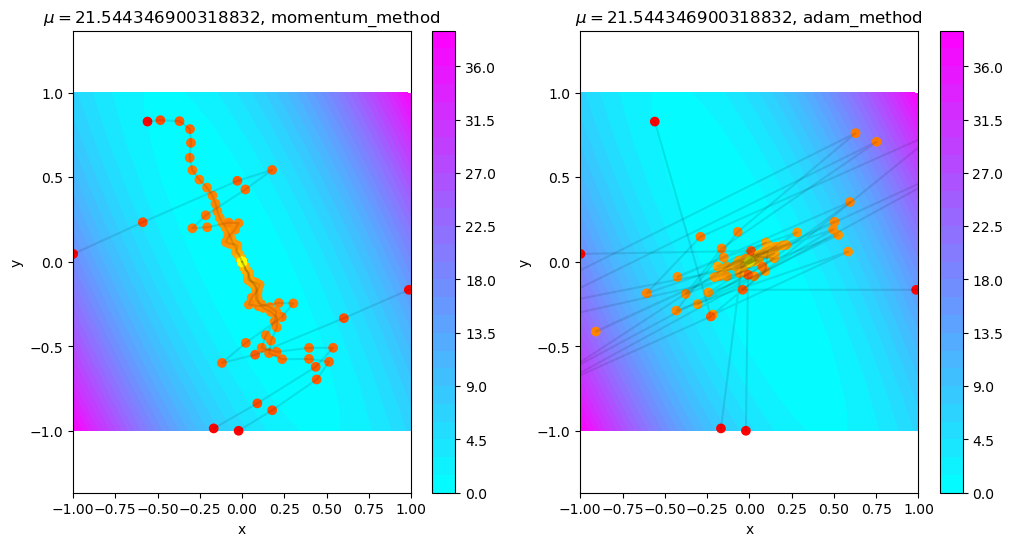

$\mu = 46.41588833612777$

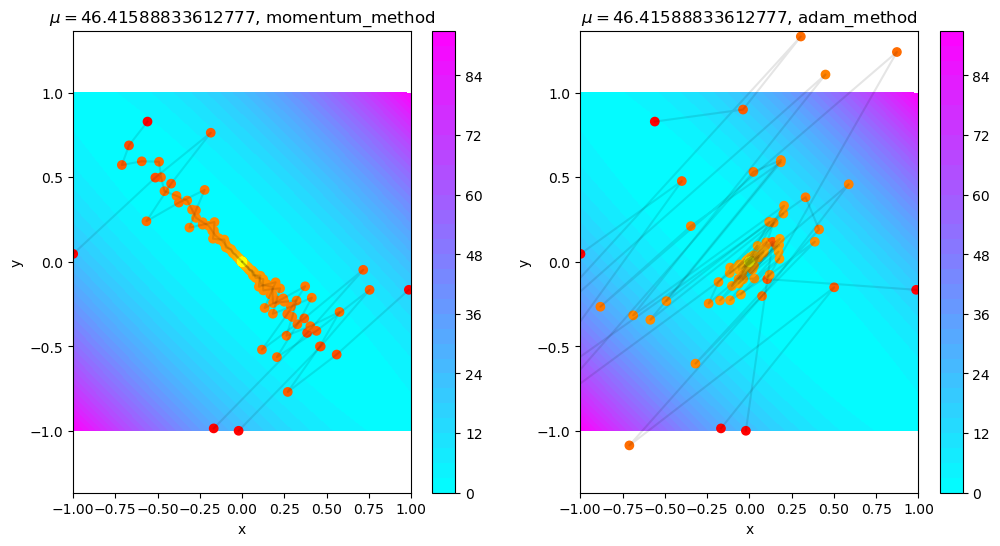

$\mu = 100.0$

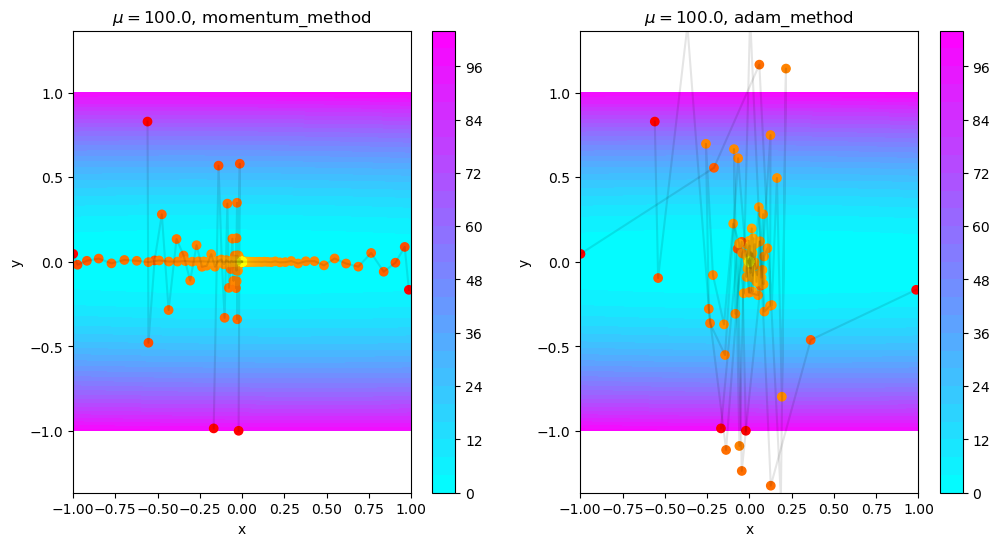

$\mu = 215.44346900318823$

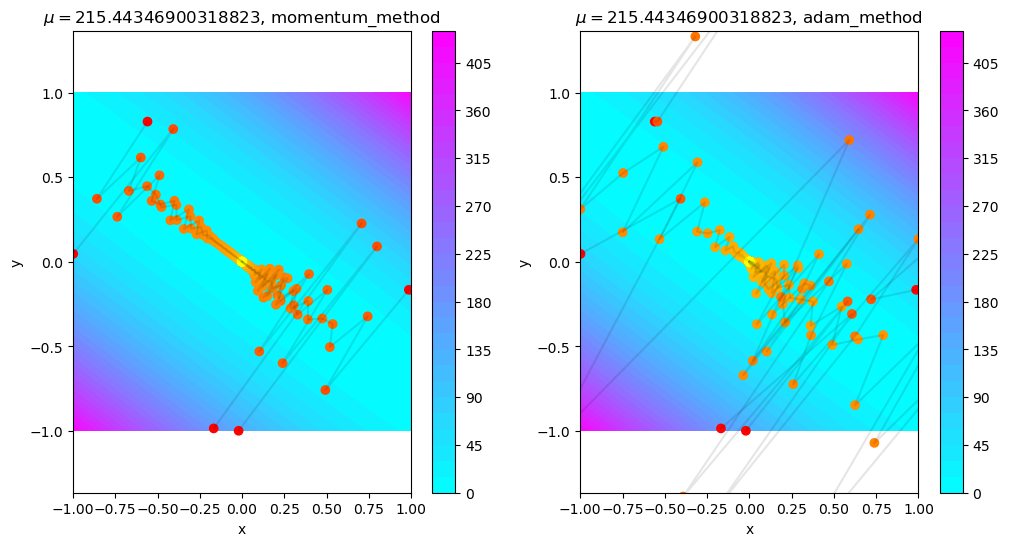

$\mu = 464.15888336127773$

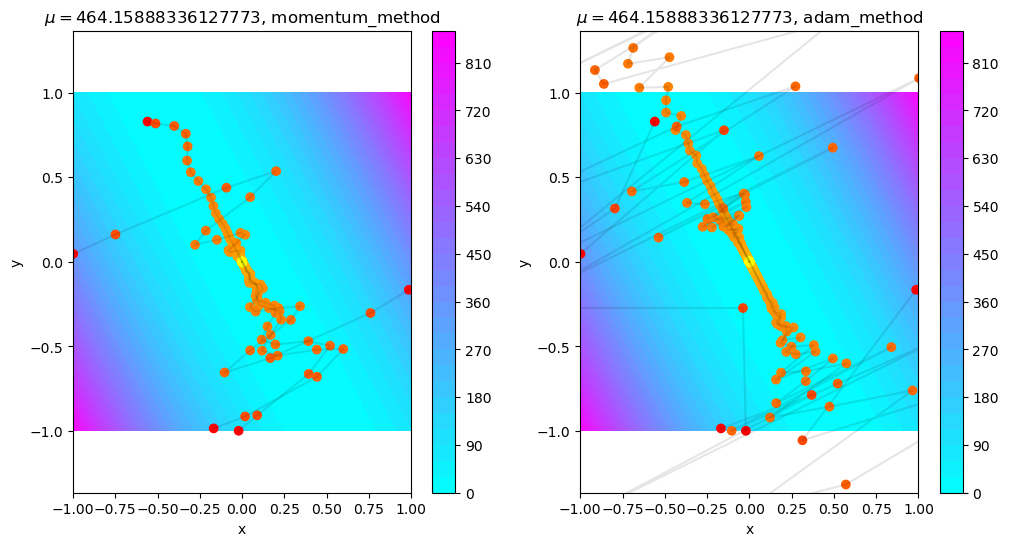

$\mu = 1000.0$

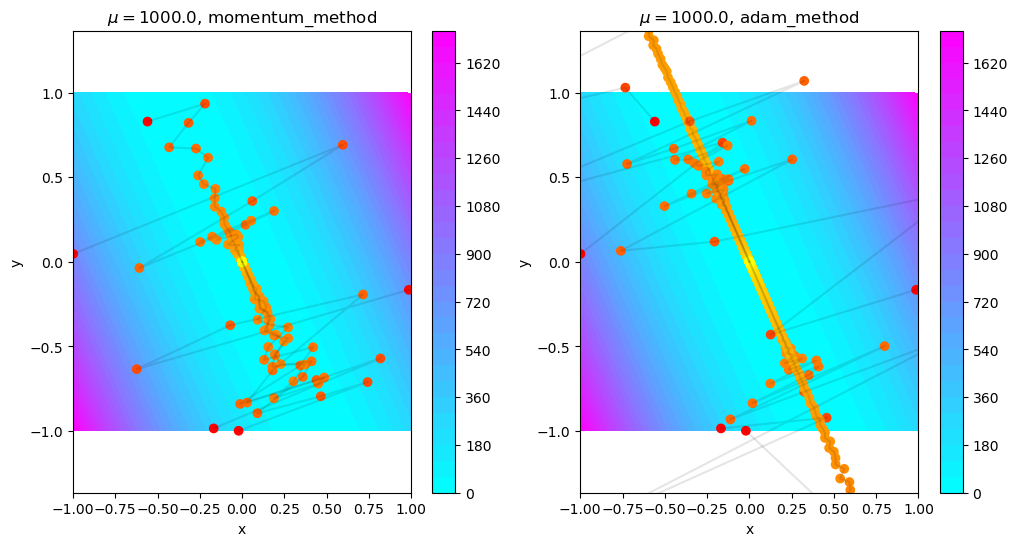

mus  momentum_method (accuracy)  momentum_method (iters)  \
0     1.000000                9.887077e-08                      616   
1     2.154435                9.833365e-08                      603   
2     4.641589                9.881661e-08                      600   
3    10.000000                9.865427e-08                      605   
4    21.544347                9.823700e-08                      604   
5    46.415888                9.880218e-08                      605   
6   100.000000                9.852614e-08                      574   
7   215.443469                9.863131e-08                      603   
8   464.158883                9.901699e-08                      597   
9  1000.000000                9.840986e-08                      616   

   momentum_method (calls)  momentum_method (grads)  adam_method (accuracy)  \
0                        0                      616            5.827375e-08   
1                        0                      603            6.961588e-08   
2                        0                      600            5.693494e-08   
3                        0                      605            5.152333e-08   
4                        0                      604            6.814479e-08   
5                        0                      605            5.374980e-08   
6                        0                      574            6.428033e-08   
7                        0                      603            9.007393e-08   
8                        0                      597            1.779492e-07   
9                        0                      616            1.623471e-03   

   adam_method (iters)  adam_method (calls)  adam_method (grads)  
0                  263                    0                  263  
1                  282                    0                  282  
2                  293                    0                  293  
3                  293                    0                  293  
4                  278                    0                  278  
5                  300                    0                  300  
6                  292                    0                  292  
7                  366                    0                  366  
8                  906                    0                  906  
9                 1000                    0                 1000

/tmp/ipykernel_50911/1420169728.py:144: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


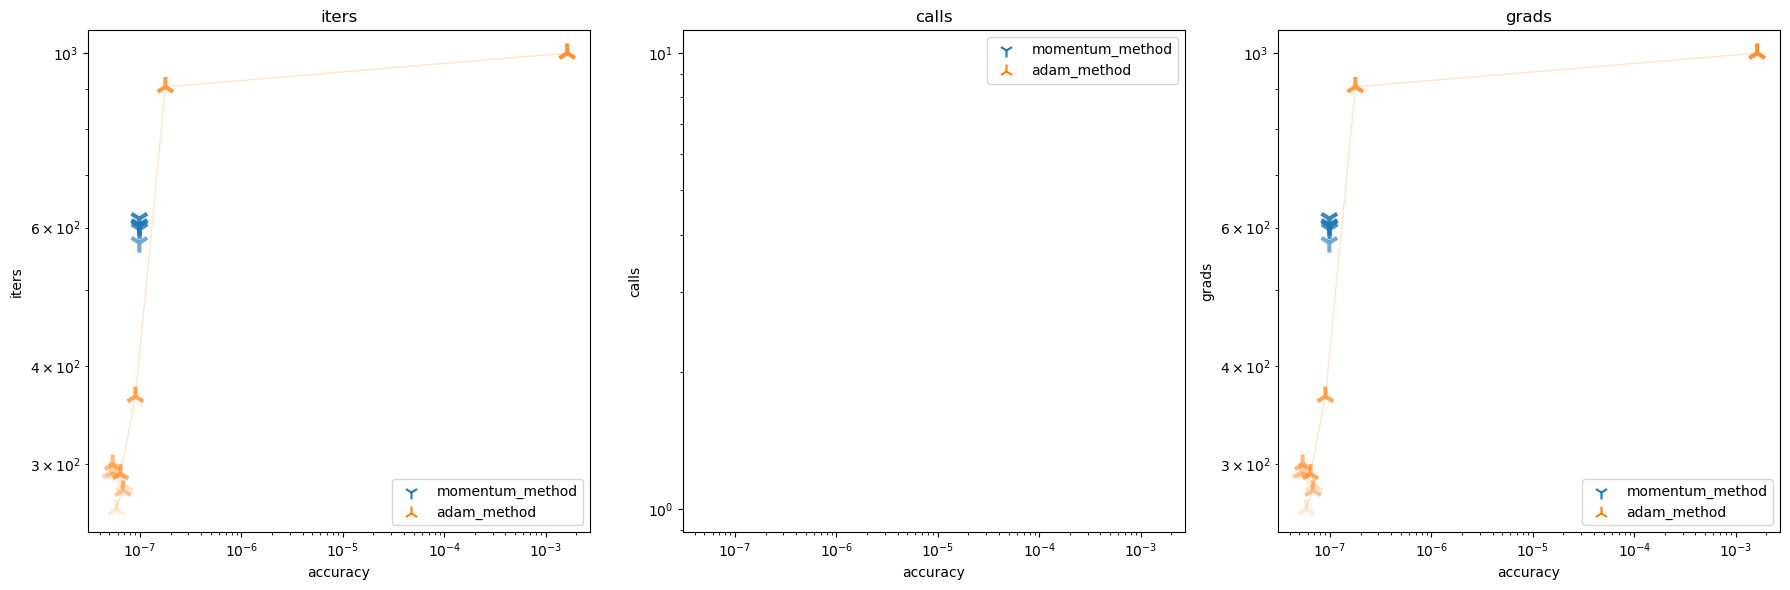

/tmp/ipykernel_50911/1420169728.py:184: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


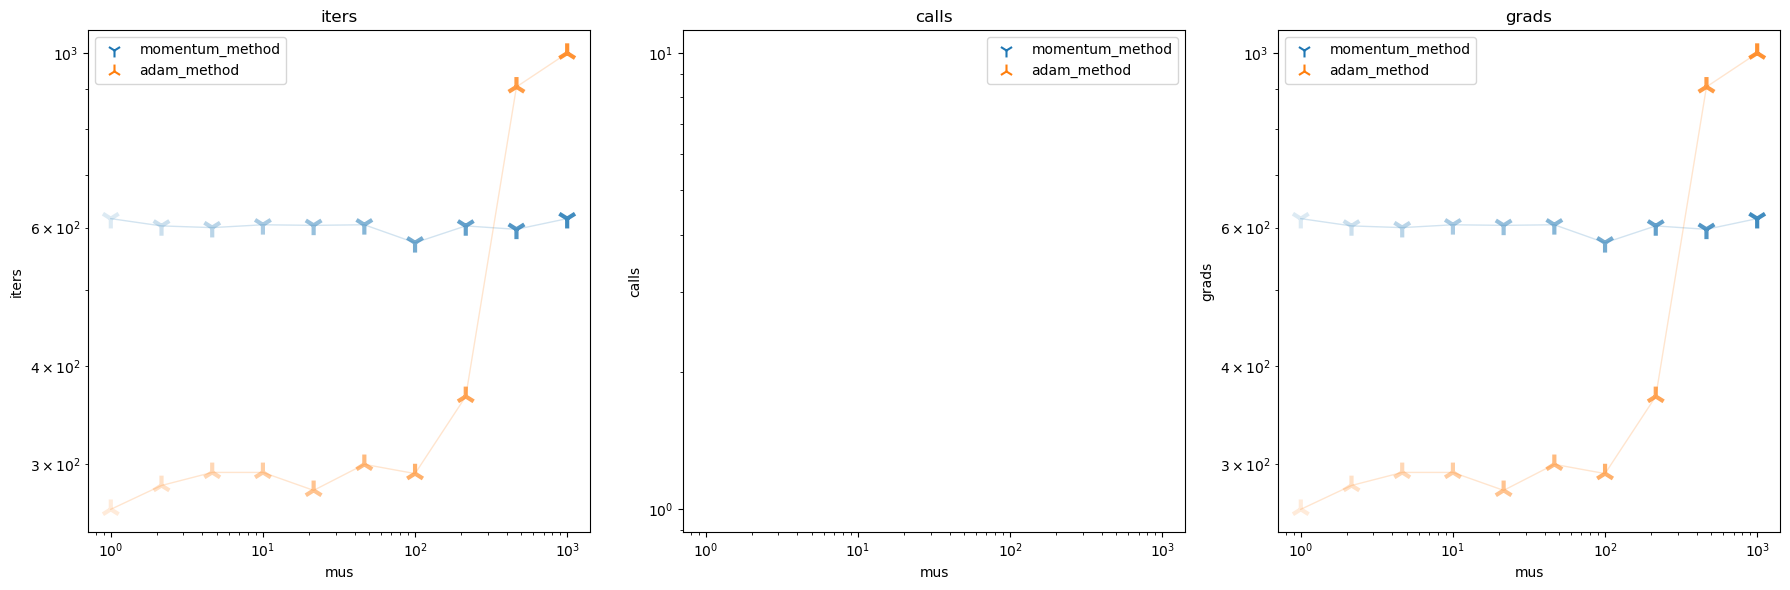

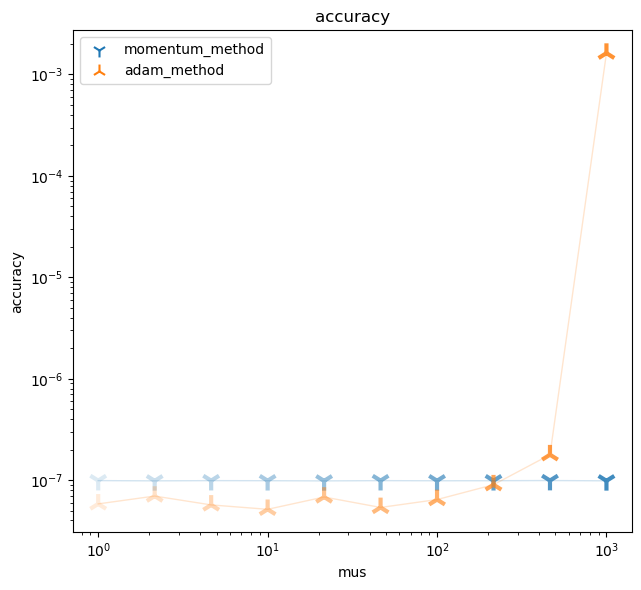

In [36]:
mus = np.logspace(0, 3, 10)
investigate_iter_vs_accuracy(mus, methods, plot_table=True, plot_illustrations=True)


mus  momentum_method (accuracy)  momentum_method (iters)  \
0    1.000000                9.883659e-08                      616   
1    1.162833                9.876509e-08                      608   
2    1.352180                9.849900e-08                      604   
3    1.572359                9.824160e-08                      591   
4    1.828391                9.883999e-08                      589   
5    2.126112                9.838141e-08                      607   
6    2.472313                9.853485e-08                      609   
7    2.874886                9.908868e-08                      589   
8    3.343012                9.841935e-08                      611   
9    3.887364                9.941265e-08                      590   
10   4.520354                9.829834e-08                      585   
11   5.256415                9.876858e-08                      583   
12   6.112331                9.836703e-08                      603   
13   7.107619                9.815544e-08                      611   
14   8.264972                9.852605e-08                      597   
15   9.610780                9.852356e-08                      610   
16  11.175729                9.930954e-08                      591   
17  12.995503                9.884509e-08                      610   
18  15.111596                9.860786e-08                      595   
19  17.572259                9.869334e-08                      609   
20  20.433597                9.898330e-08                      594   
21  23.760855                9.849772e-08                      589   
22  27.629900                9.809299e-08                      594   
23  32.128951                9.845277e-08                      573   
24  37.360596                9.802113e-08                      611   
25  43.444123                9.825363e-08                      610   
26  50.518247                9.927600e-08                      577   
27  58.744271                9.859823e-08                      611   
28  68.309760                9.886895e-08                      578   
29  79.432823                9.893525e-08                      607   

    momentum_method (calls)  momentum_method (grads)  adam_method (accuracy)  \
0                         0                      616            6.725007e-08   
1                         0                      608            5.983252e-08   
2                         0                      604            3.871816e-08   
3                         0                      591            6.931903e-08   
4                         0                      589            5.599516e-08   
5                         0                      607            6.711318e-08   
6                         0                      609            7.404992e-08   
7                         0                      589            8.025906e-08   
8                         0                      611            6.790140e-08   
9                         0                      590            6.544355e-08   
10                        0                      585            6.176114e-08   
11                        0                      583            7.193810e-08   
12                        0                      603            6.606642e-08   
13                        0                      611            5.090709e-08   
14                        0                      597            7.457002e-08   
15                        0                      610            6.925323e-08   
16                        0                      591            4.853728e-08   
17                        0                      610            6.586871e-08   
18                        0                      595            6.164013e-08   
19                        0                      609            6.371184e-08   
20                        0                      594            6.211157e-08   
21                        0                      589            6.585471e-08   

/tmp/ipykernel_50911/1420169728.py:144: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


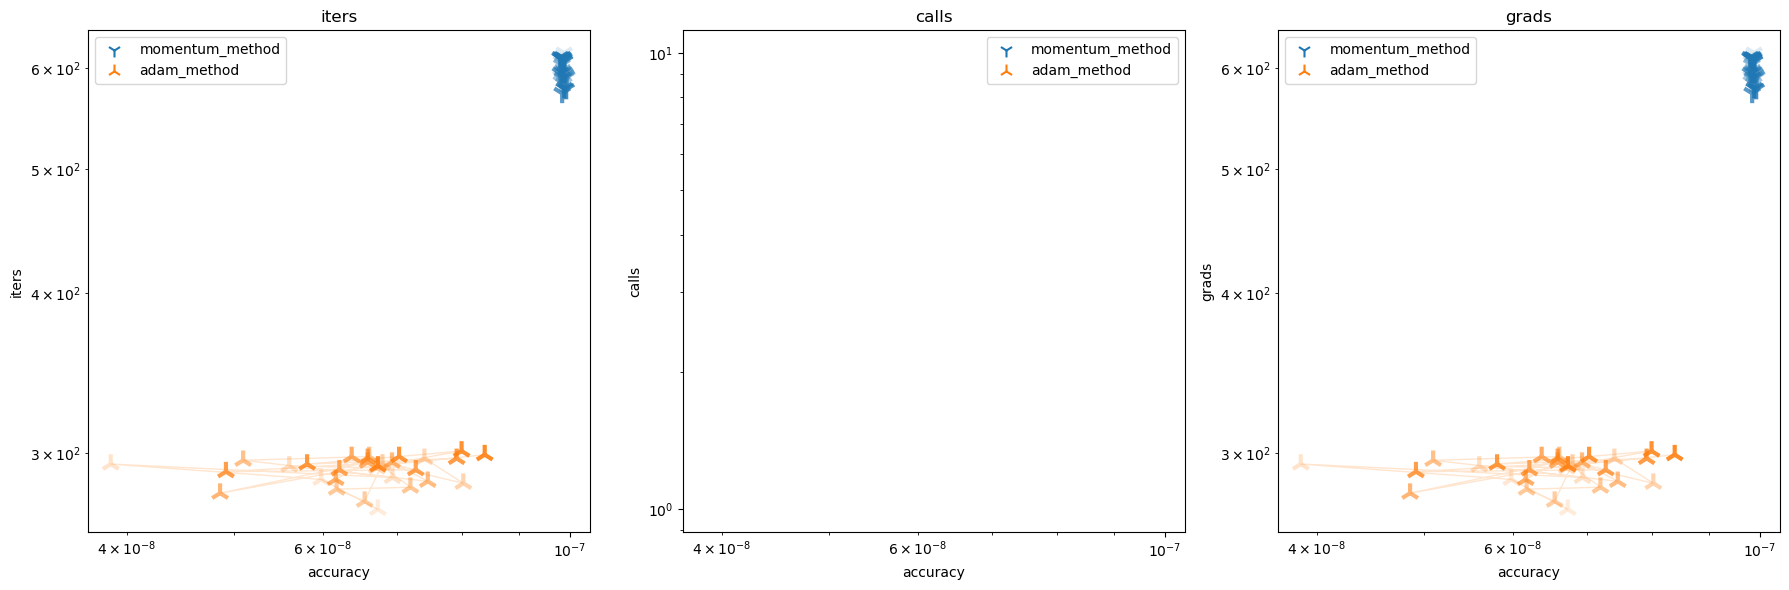

/tmp/ipykernel_50911/1420169728.py:184: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


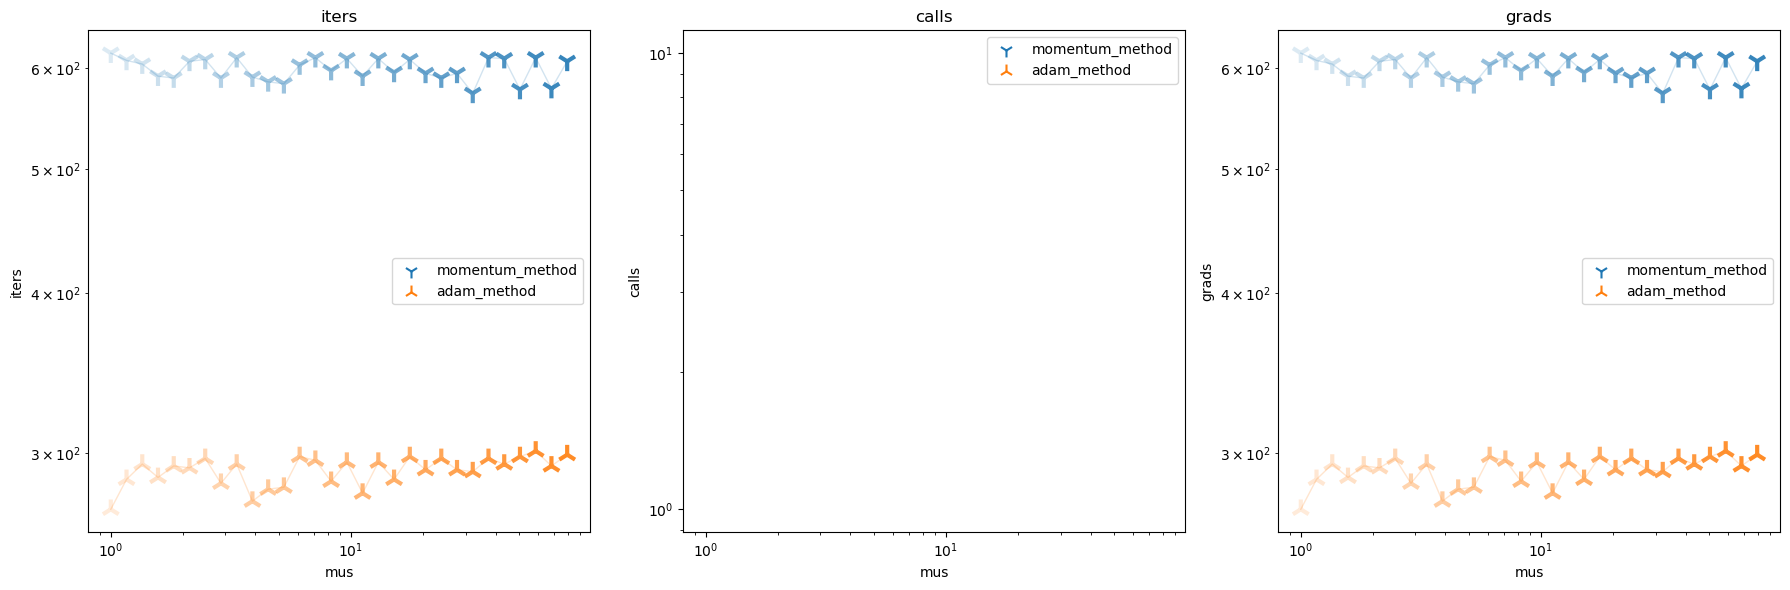

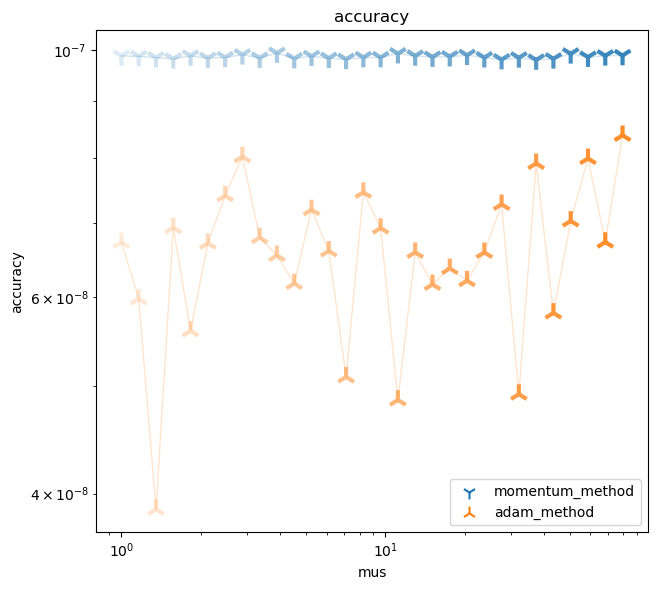

In [37]:
mus = np.logspace(0, 1.9, 30)
investigate_iter_vs_accuracy(mus, methods, plot_table=True, plot_illustrations=False)
